In [1]:
import pandas as pd
import networkx as nx
import matplotlib
import pickle
import numpy as np
import io

from IPython.display import display, HTML

from utils import *

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

dpi = 330
matplotlib.rcParams['figure.dpi']= dpi

In [9]:
data = pd.read_csv("./beer_reviews.csv") 

In [10]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [11]:
size = len(data)

In [12]:
graph = build_graph(data, 20, debug=True)

Found 14806 duplicates.
Attrs for edge "fodeeoz", 436:
{'weight': 3.0, 'review_aroma': 2.0, 'review_appearance': 3.0, 'review_palate': 2.5, 'review_taste': 2.5}
Example attrs for node 436:
{'beer_style': 'Light Lager', 'brewery_id': 163, 'beer_abv': 3.5}
Adding 1682942 edges from beer similarity based on styles.
Adding 175666 edges from beer similarity based on breweries.


In [13]:
print("Número de nodos: "+str(graph.number_of_nodes()))
print("Número de aristas: "+str(graph.number_of_edges()))

Número de nodos: 41070
Número de aristas: 3222937


In [20]:
len([1 for x, y in graph.edges() if isinstance(x, str) and isinstance(y, int)])

1374148

history_u_lists: diccionario item-> usuarios que lo compraron
history_ur_lists: diccionario item-> ratings (del usuario que lo compro) (igual largo que el anterior)

history_v_lists: diccionario usuario-> items que compro
history_vr_lists: diccionario usuario-> ratin para el item que compro (igual largo que el anterior)

train_u: lista de ids de items para train
train_v: lista de ids de usuarios para train
train_r: lista de ratings para train
Todo esto tiene que coincidir por indice (HORRIBLE). Los largos de los 3 coinciden. Estan codificando (de la peor forma) tripletas usuario-item-rating. 

social_adj_lists: diccionario usuario: set de usuarios conectados

ratings_list: diccionario con rating posible-> indice - {2.0: 0, 1.0: 1, 3.0: 2, 4.0: 3, 2.5: 4, 3.5: 5, 1.5: 6, 0.5: 7}



In [9]:
data = decompose_graph(graph)

1
2


/home/fabrizio/projects/beer-recommender/utils.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for user, item in graph.edges()


6


/home/fabrizio/Envs/beer-rec/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Done transforming. 
7


In [10]:
with open('data_train_val_test.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
from run_GraphRec_example import run

In [4]:
with open('data_train_val_test.pkl', 'rb') as handle:
    data = pickle.load(handle)

[1,  1000] loss: 0.011, The best rmse/mae: 9999.000000 / 9999.000000
[1,  2000] loss: 0.009, The best rmse/mae: 9999.000000 / 9999.000000
[1,  3000] loss: 0.007, The best rmse/mae: 9999.000000 / 9999.000000
[1,  4000] loss: 0.006, The best rmse/mae: 9999.000000 / 9999.000000
[1,  5000] loss: 0.005, The best rmse/mae: 9999.000000 / 9999.000000
[1,  6000] loss: 0.005, The best rmse/mae: 9999.000000 / 9999.000000
[1,  7000] loss: 0.004, The best rmse/mae: 9999.000000 / 9999.000000
[1,  8000] loss: 0.004, The best rmse/mae: 9999.000000 / 9999.000000
TRAIN metrics for field overall:
0.7529949550814283
0.59700274
TRAIN metrics for field review_aroma:
0.6994591411603257
0.55826235
TRAIN metrics for field review_appearance:
0.6686484687595953
0.5304371
TRAIN metrics for field review_palate:
0.6666302124626511
0.5299757
TRAIN metrics for field review_taste:
0.7069481648053909
0.5667348
VALIDATION metrics for field overall:
0.8574000119004851
0.6813227
VALIDATION metrics for field review_aroma:


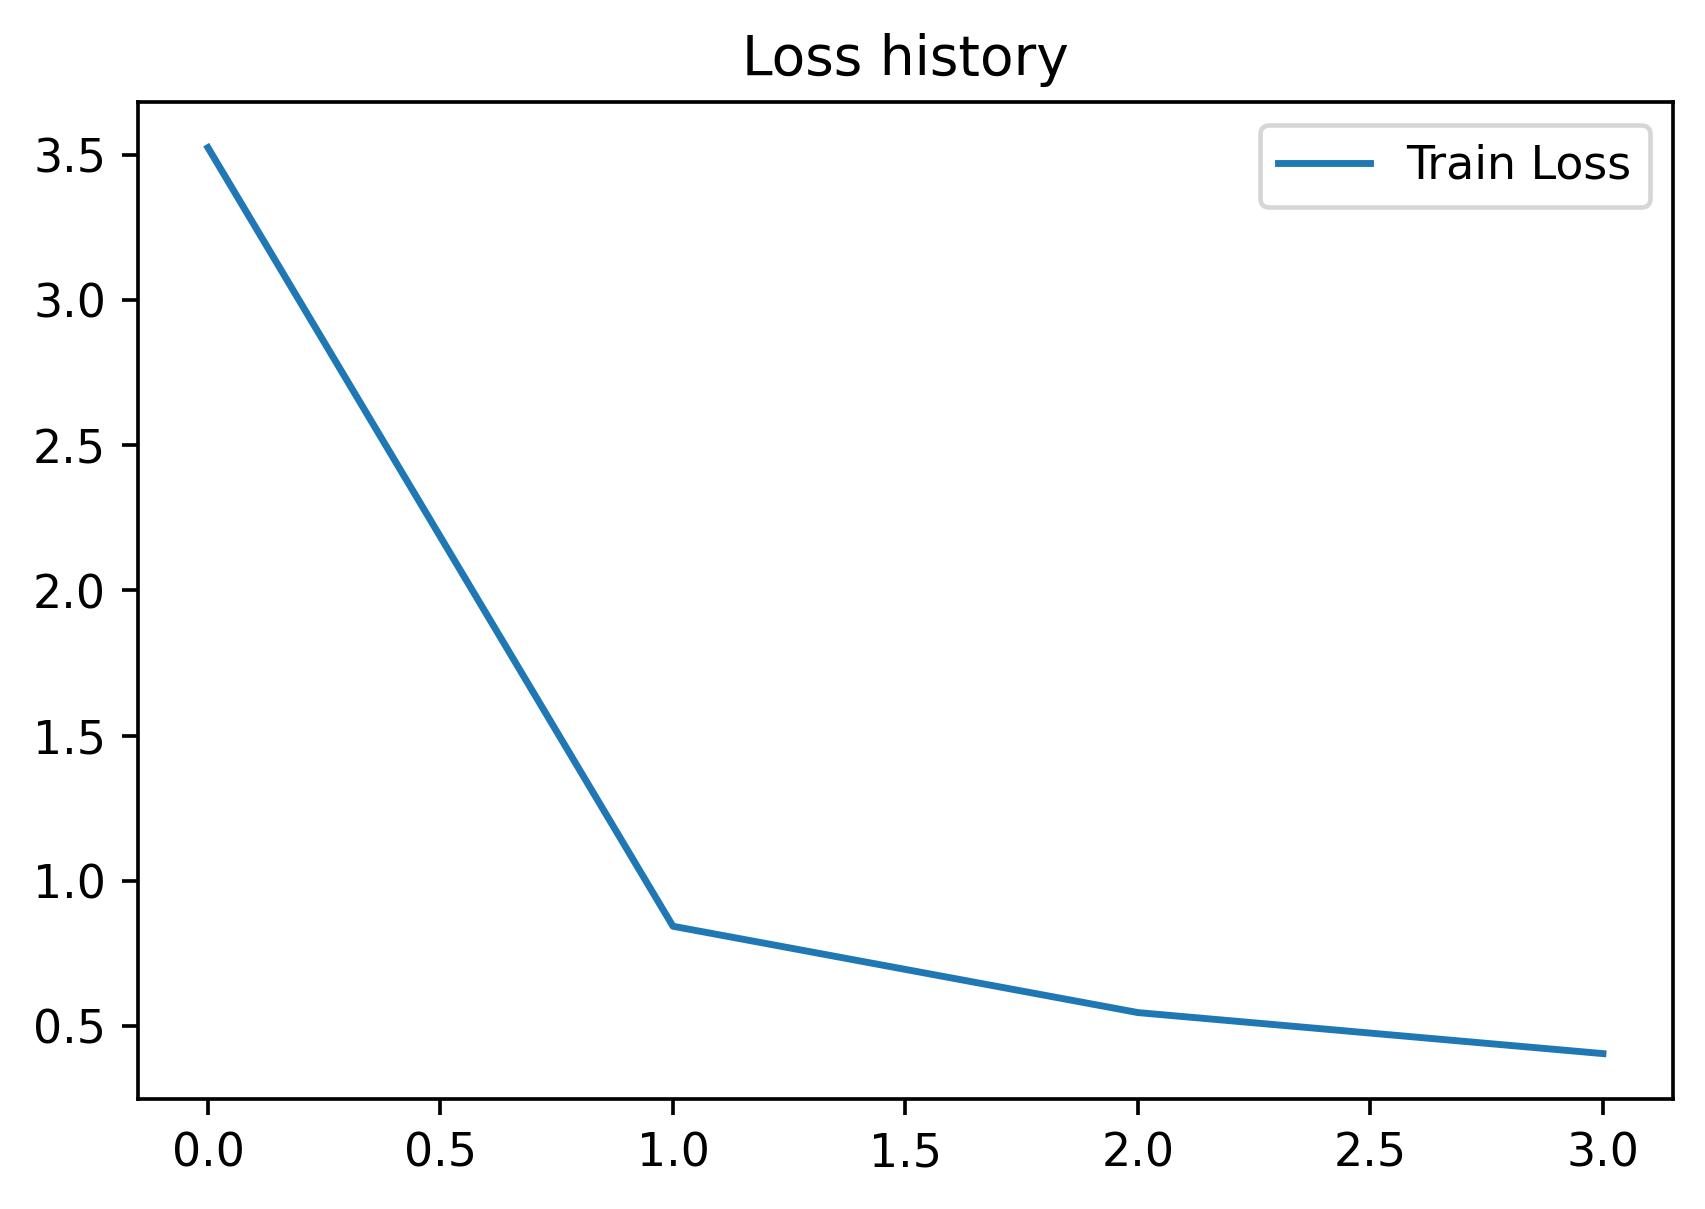

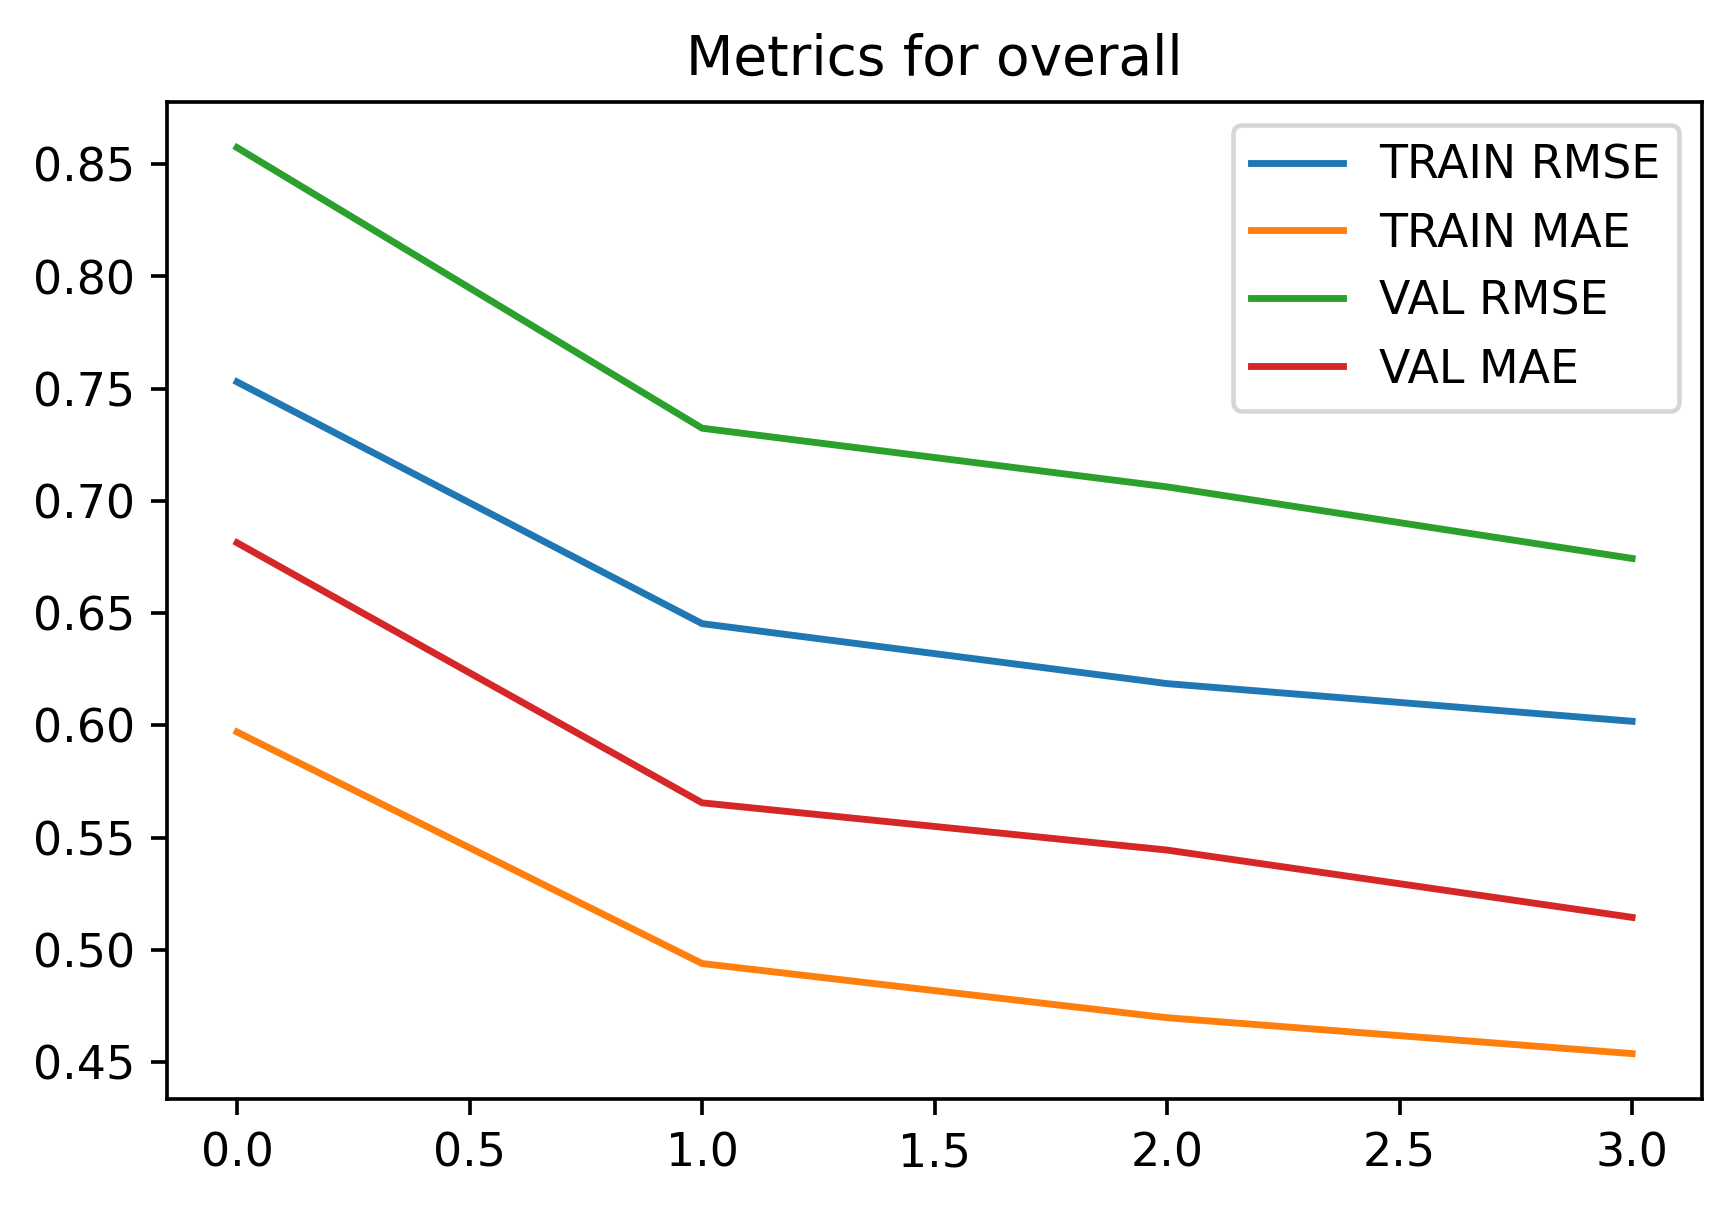

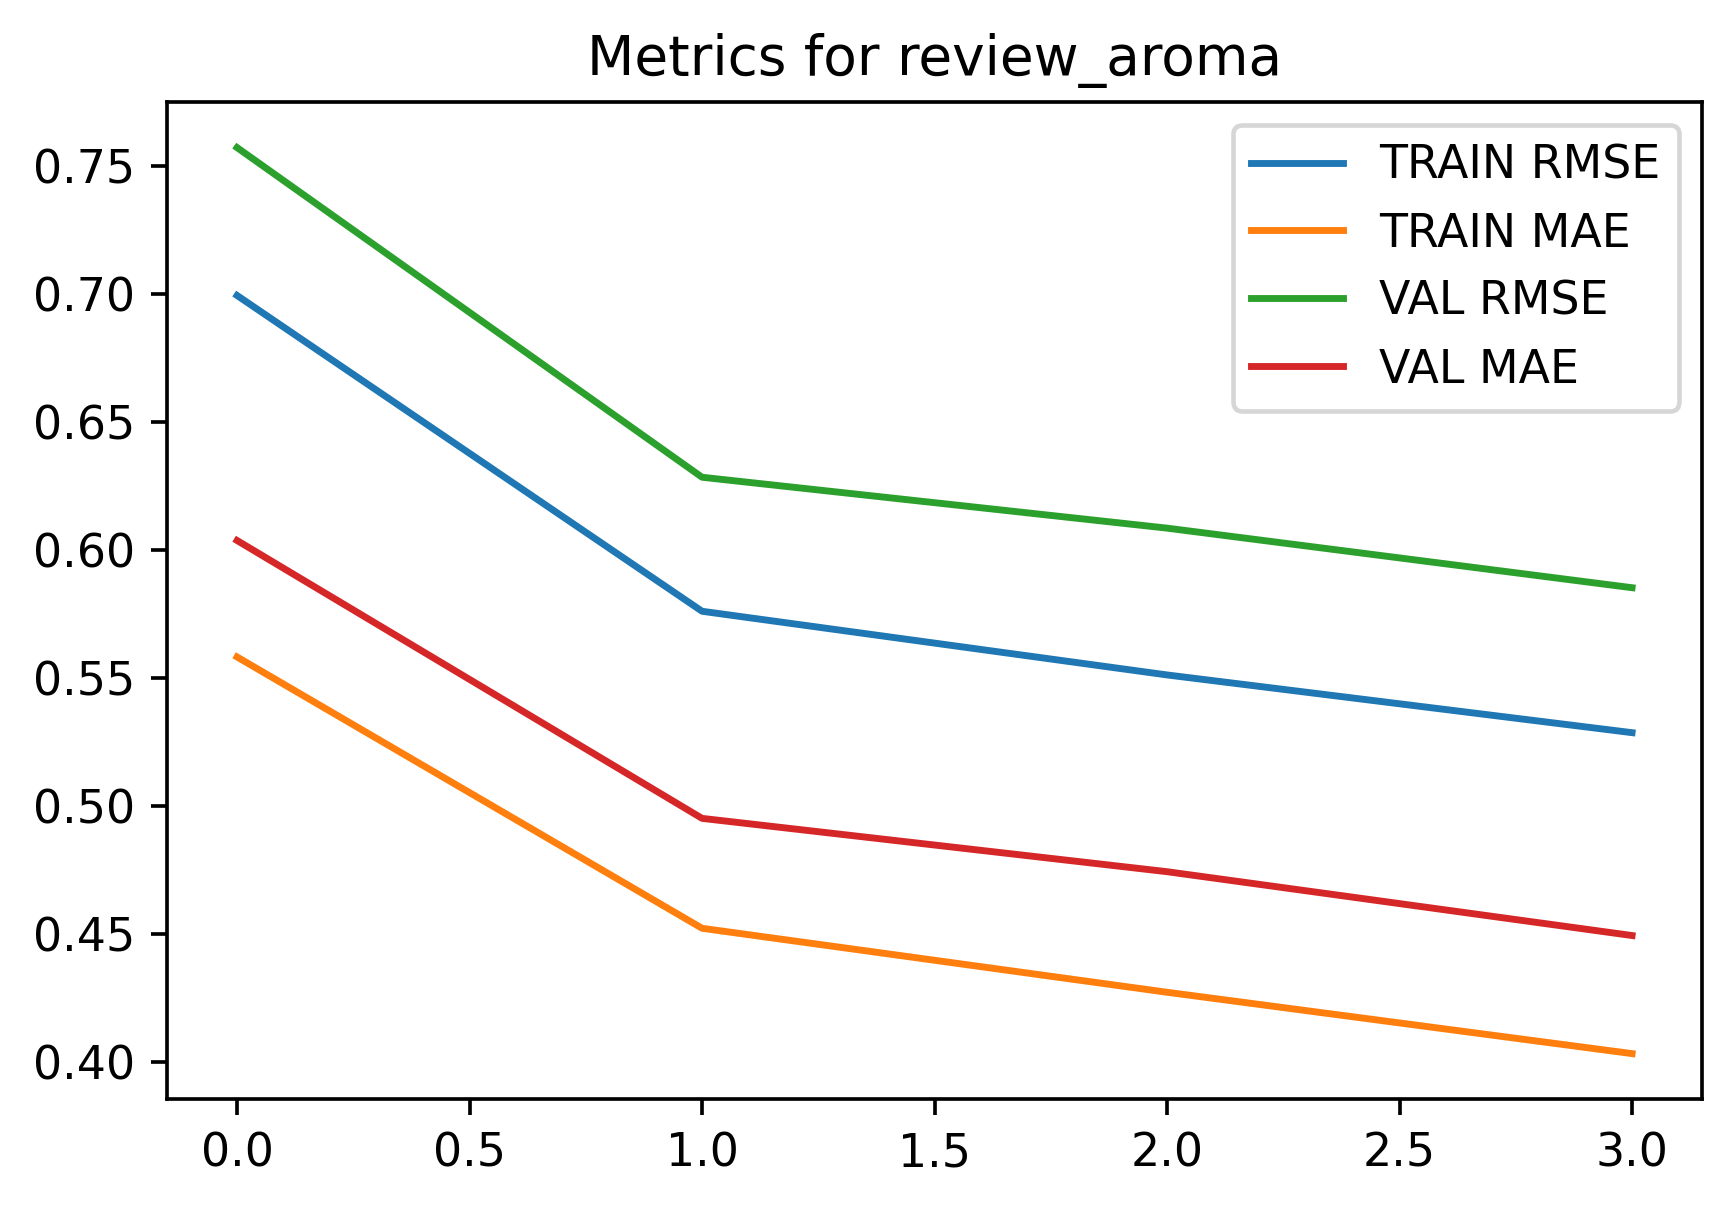

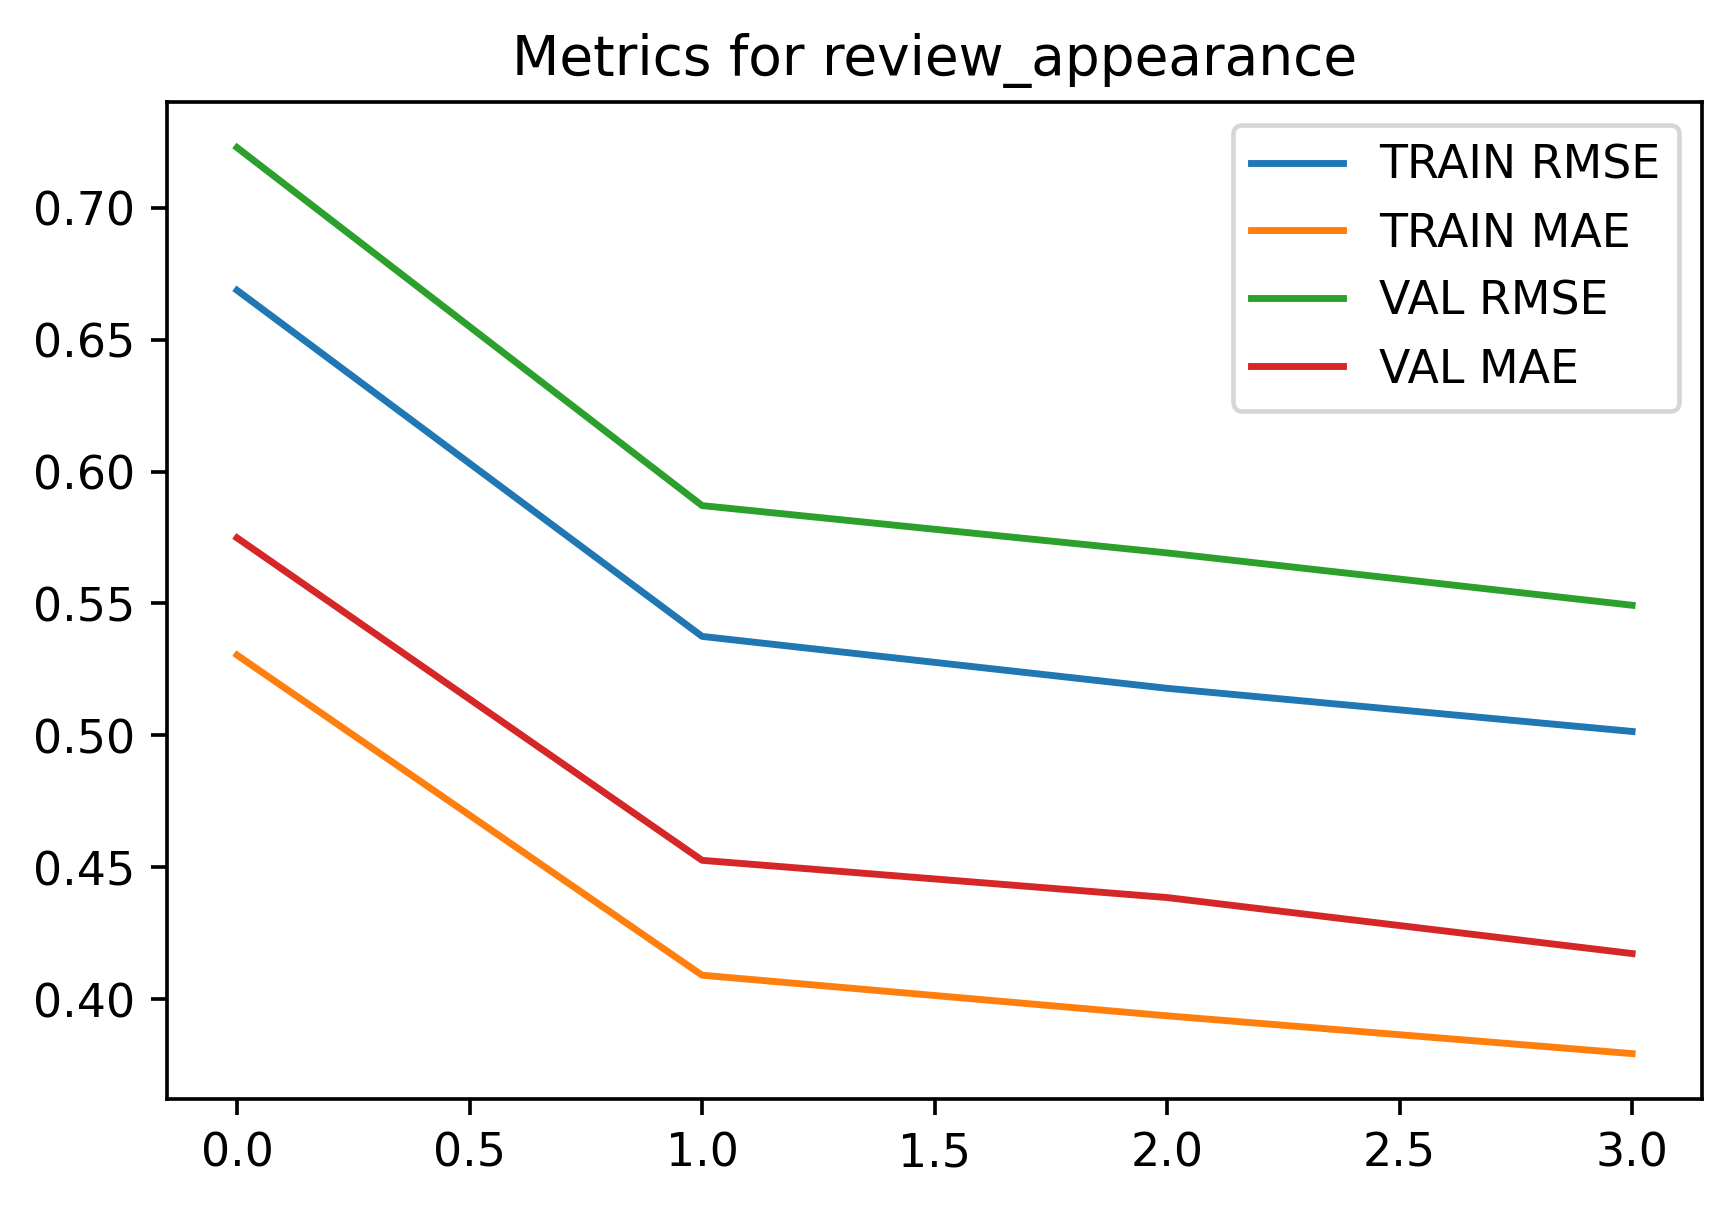

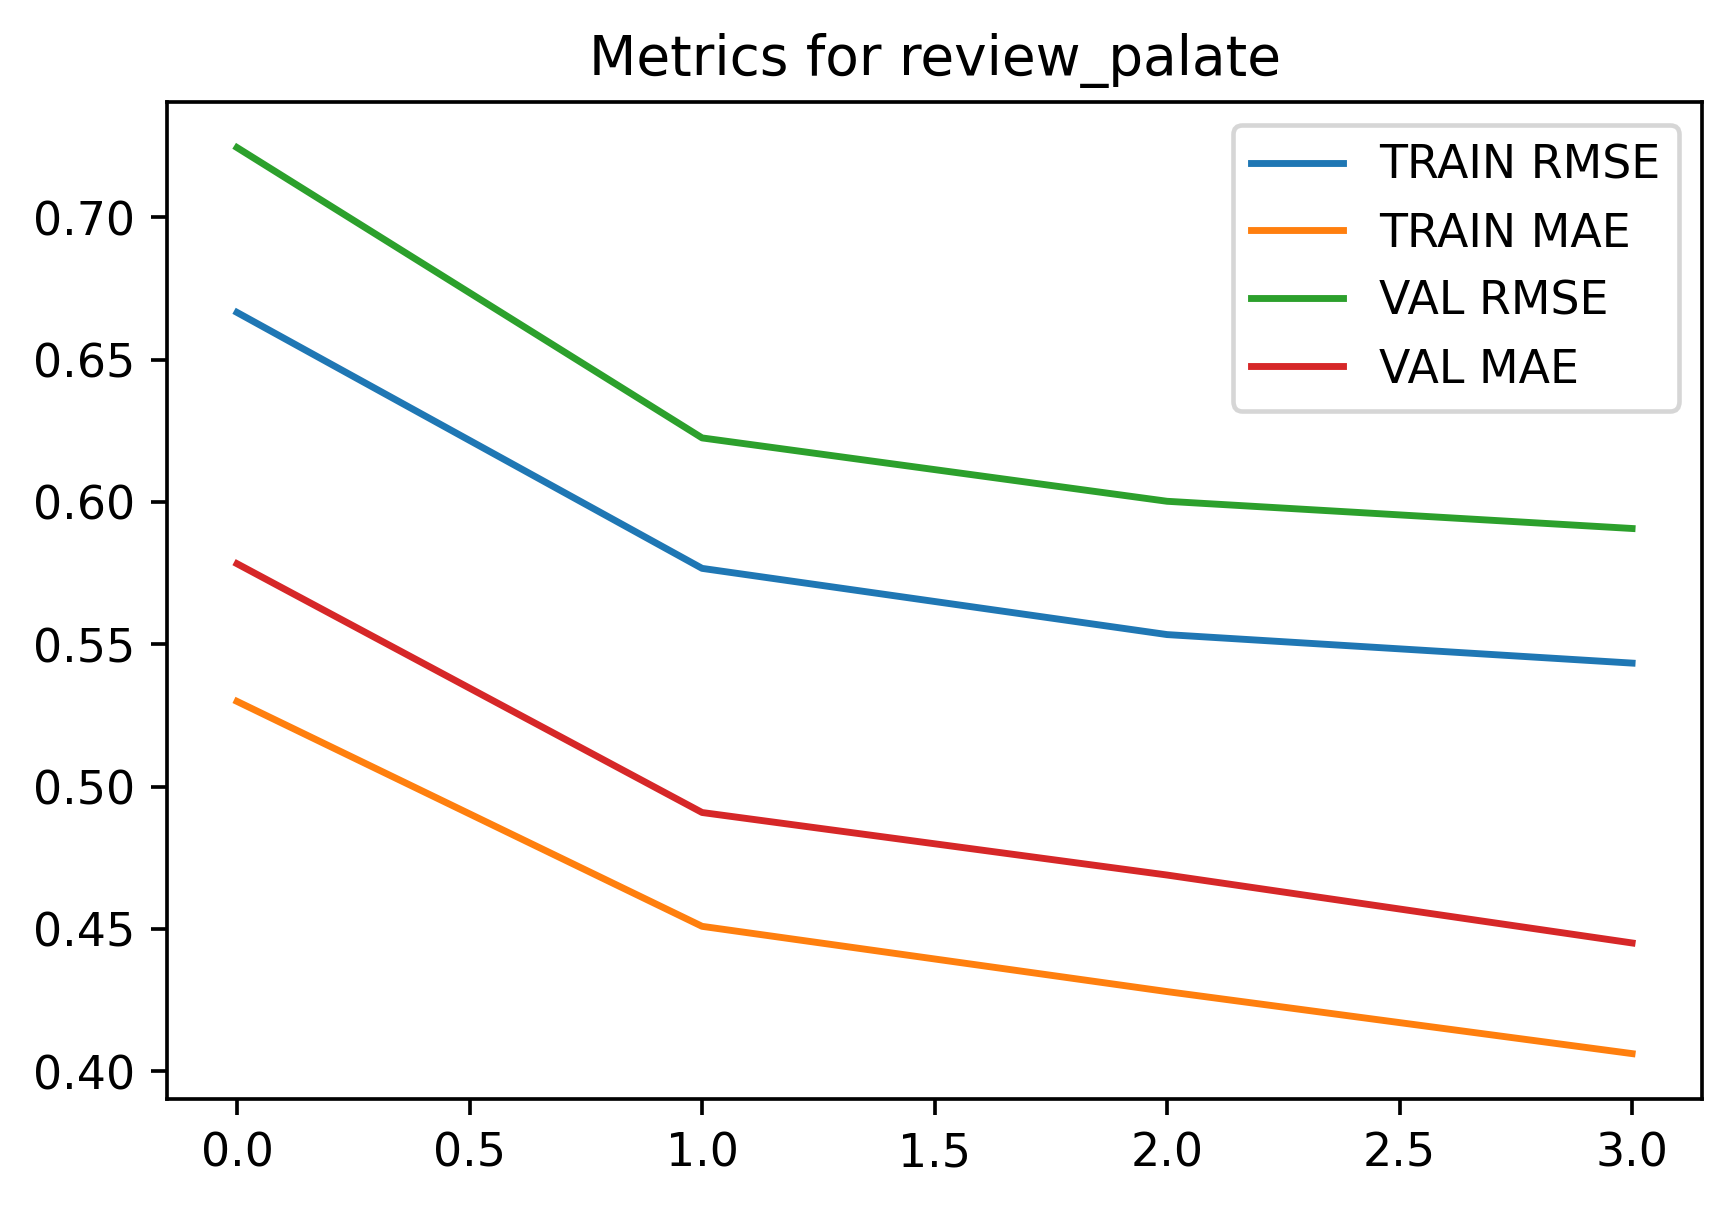

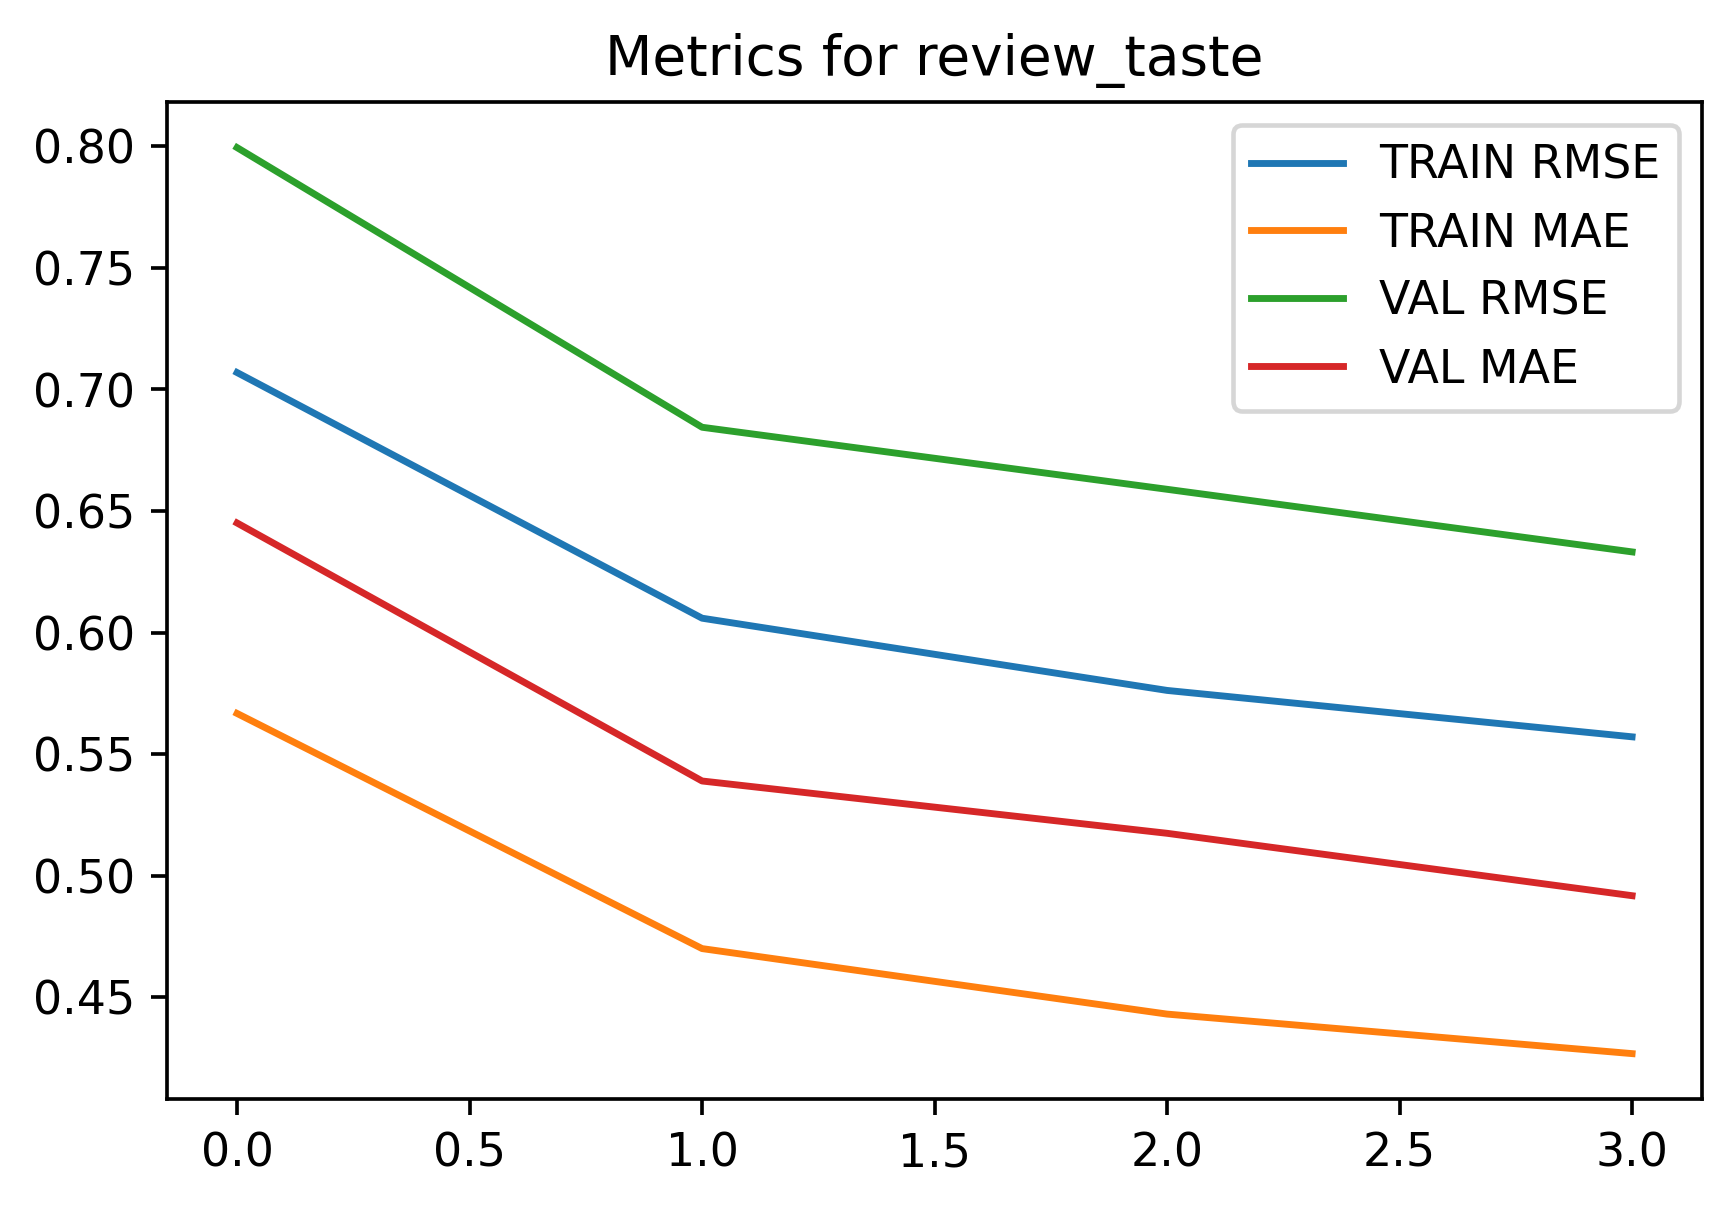

TEST metrics for field overall:
0.7399308682059214
0.5728796
TEST metrics for field review_aroma:
0.6541422191433245
0.5107823
TEST metrics for field review_appearance:
0.5868065556273757
0.4504636
TEST metrics for field review_palate:
0.6490363607345446
0.49392062
TEST metrics for field review_taste:
0.7191023584863221
0.56901616


In [5]:
run(data, use_similarity=True, gpu='1', epochs=4, lr=1e-4, embed_dim=32, r_hidden_dim=64)

[1,  1000] loss: 0.011, The best rmse/mae: 9999.000000 / 9999.000000
[1,  2000] loss: 0.008, The best rmse/mae: 9999.000000 / 9999.000000
[1,  3000] loss: 0.007, The best rmse/mae: 9999.000000 / 9999.000000
[1,  4000] loss: 0.006, The best rmse/mae: 9999.000000 / 9999.000000
[1,  5000] loss: 0.005, The best rmse/mae: 9999.000000 / 9999.000000
[1,  6000] loss: 0.004, The best rmse/mae: 9999.000000 / 9999.000000
[1,  7000] loss: 0.004, The best rmse/mae: 9999.000000 / 9999.000000
[1,  8000] loss: 0.003, The best rmse/mae: 9999.000000 / 9999.000000
TRAIN metrics for field overall:
0.7023665045763997
0.5472194
TRAIN metrics for field review_aroma:
0.6227308326766885
0.49428493
TRAIN metrics for field review_appearance:
0.6306259148461594
0.48542044
TRAIN metrics for field review_palate:
0.6596040617102932
0.5189522
TRAIN metrics for field review_taste:
0.6766835401769216
0.53386414
VALIDATION metrics for field overall:
0.8385548481981274
0.649095
VALIDATION metrics for field review_aroma:


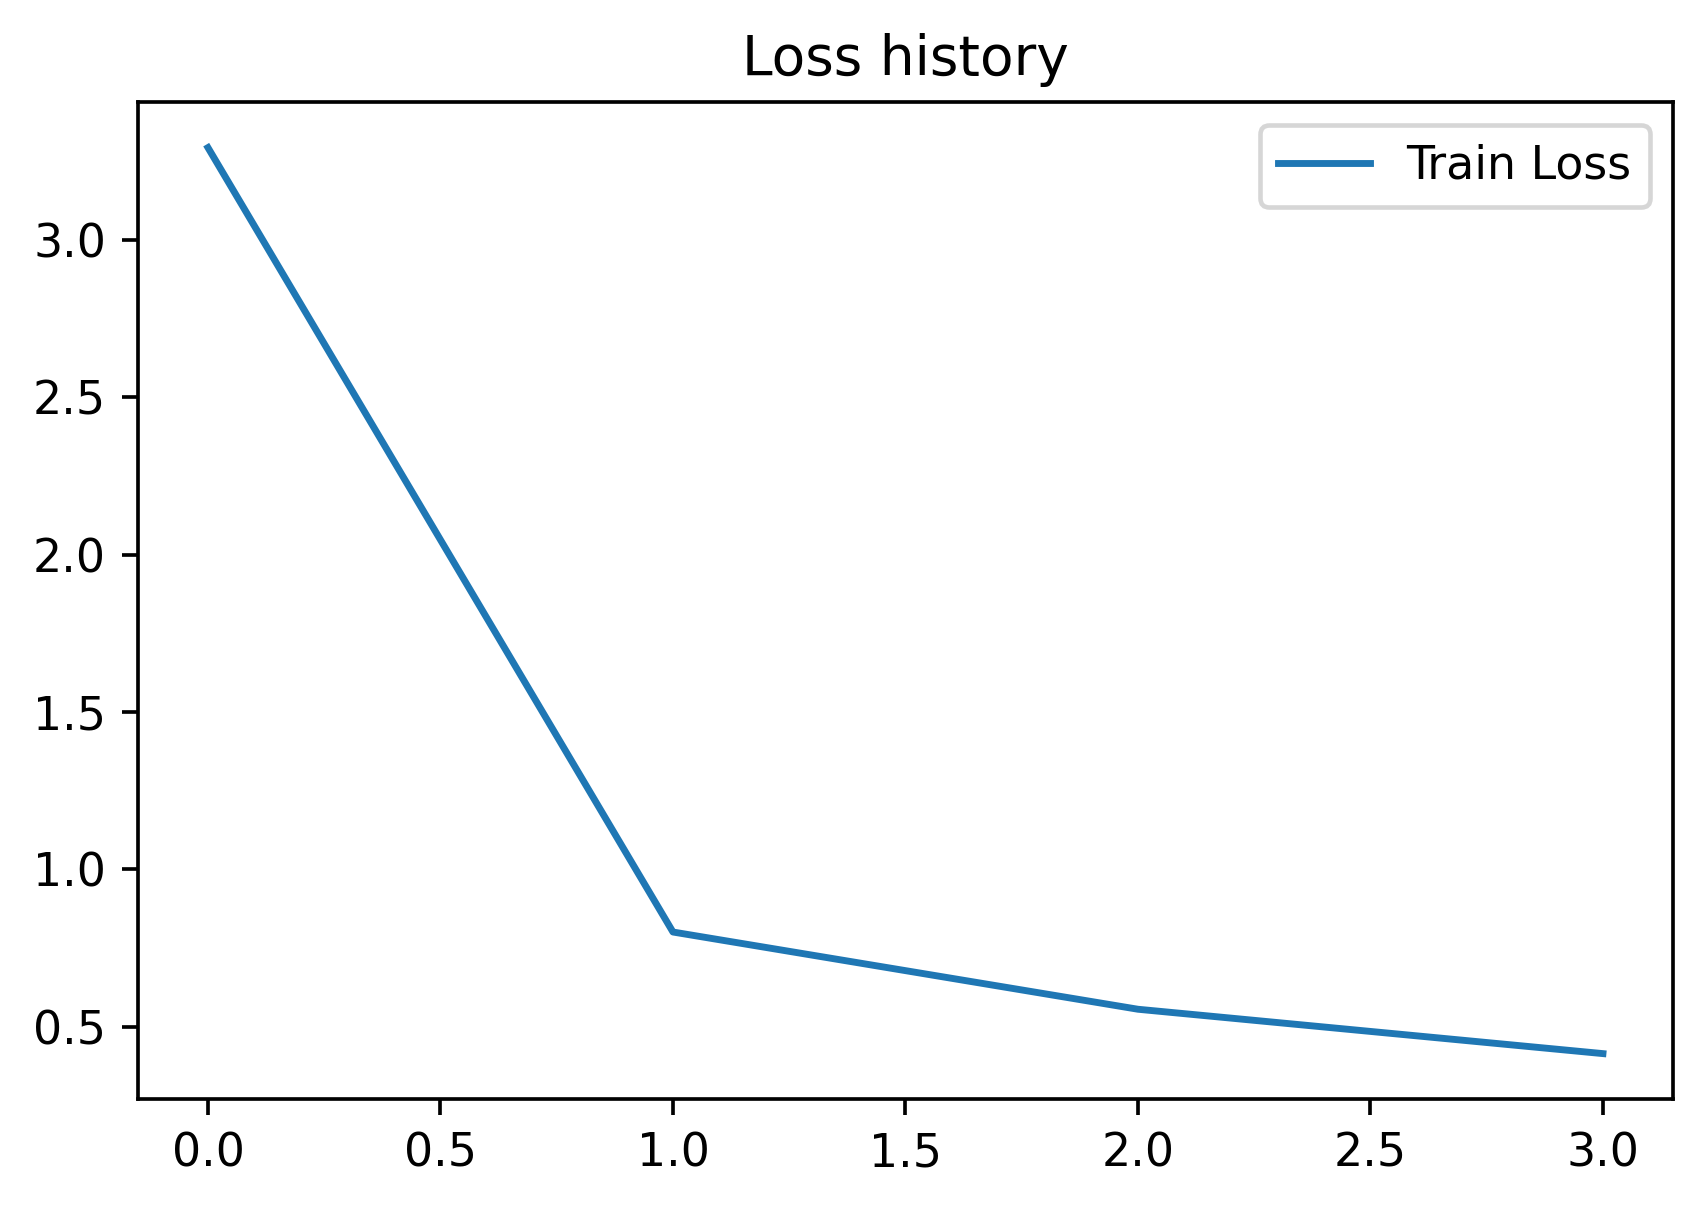

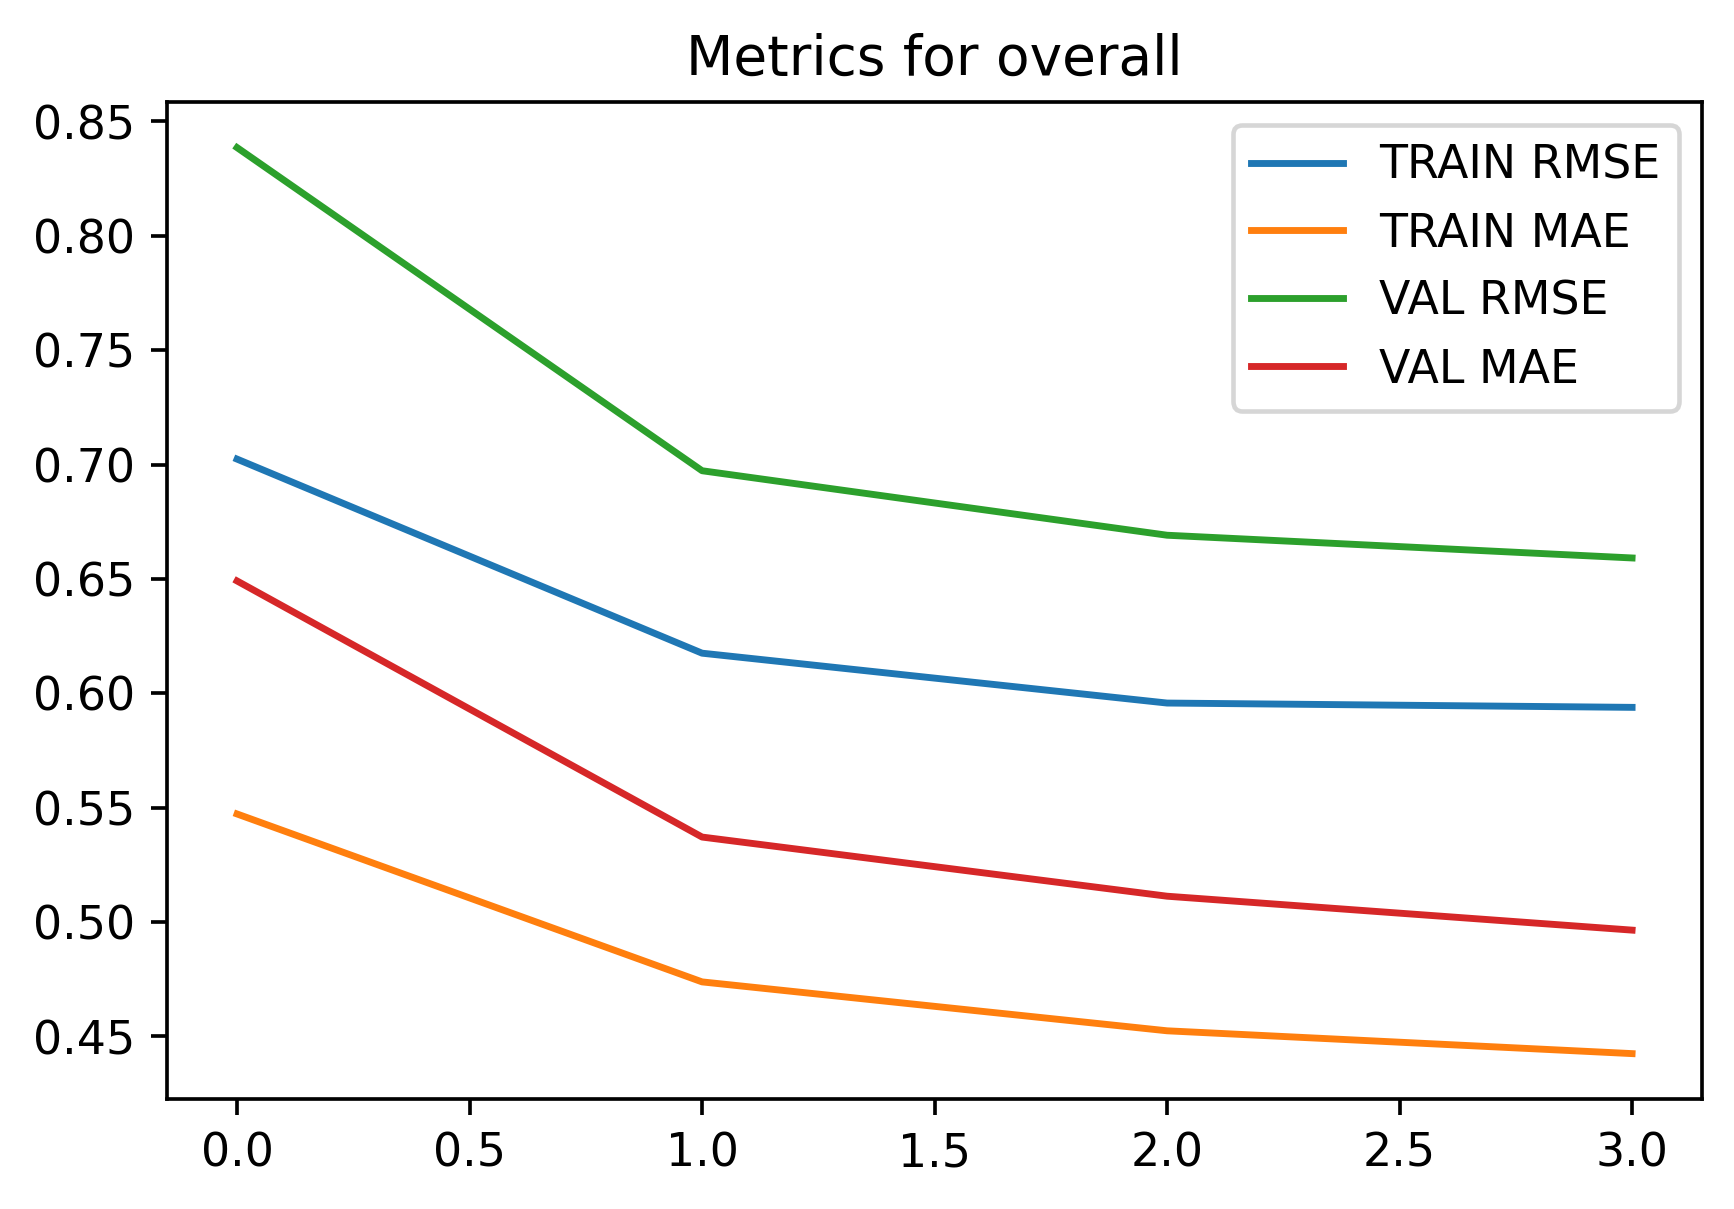

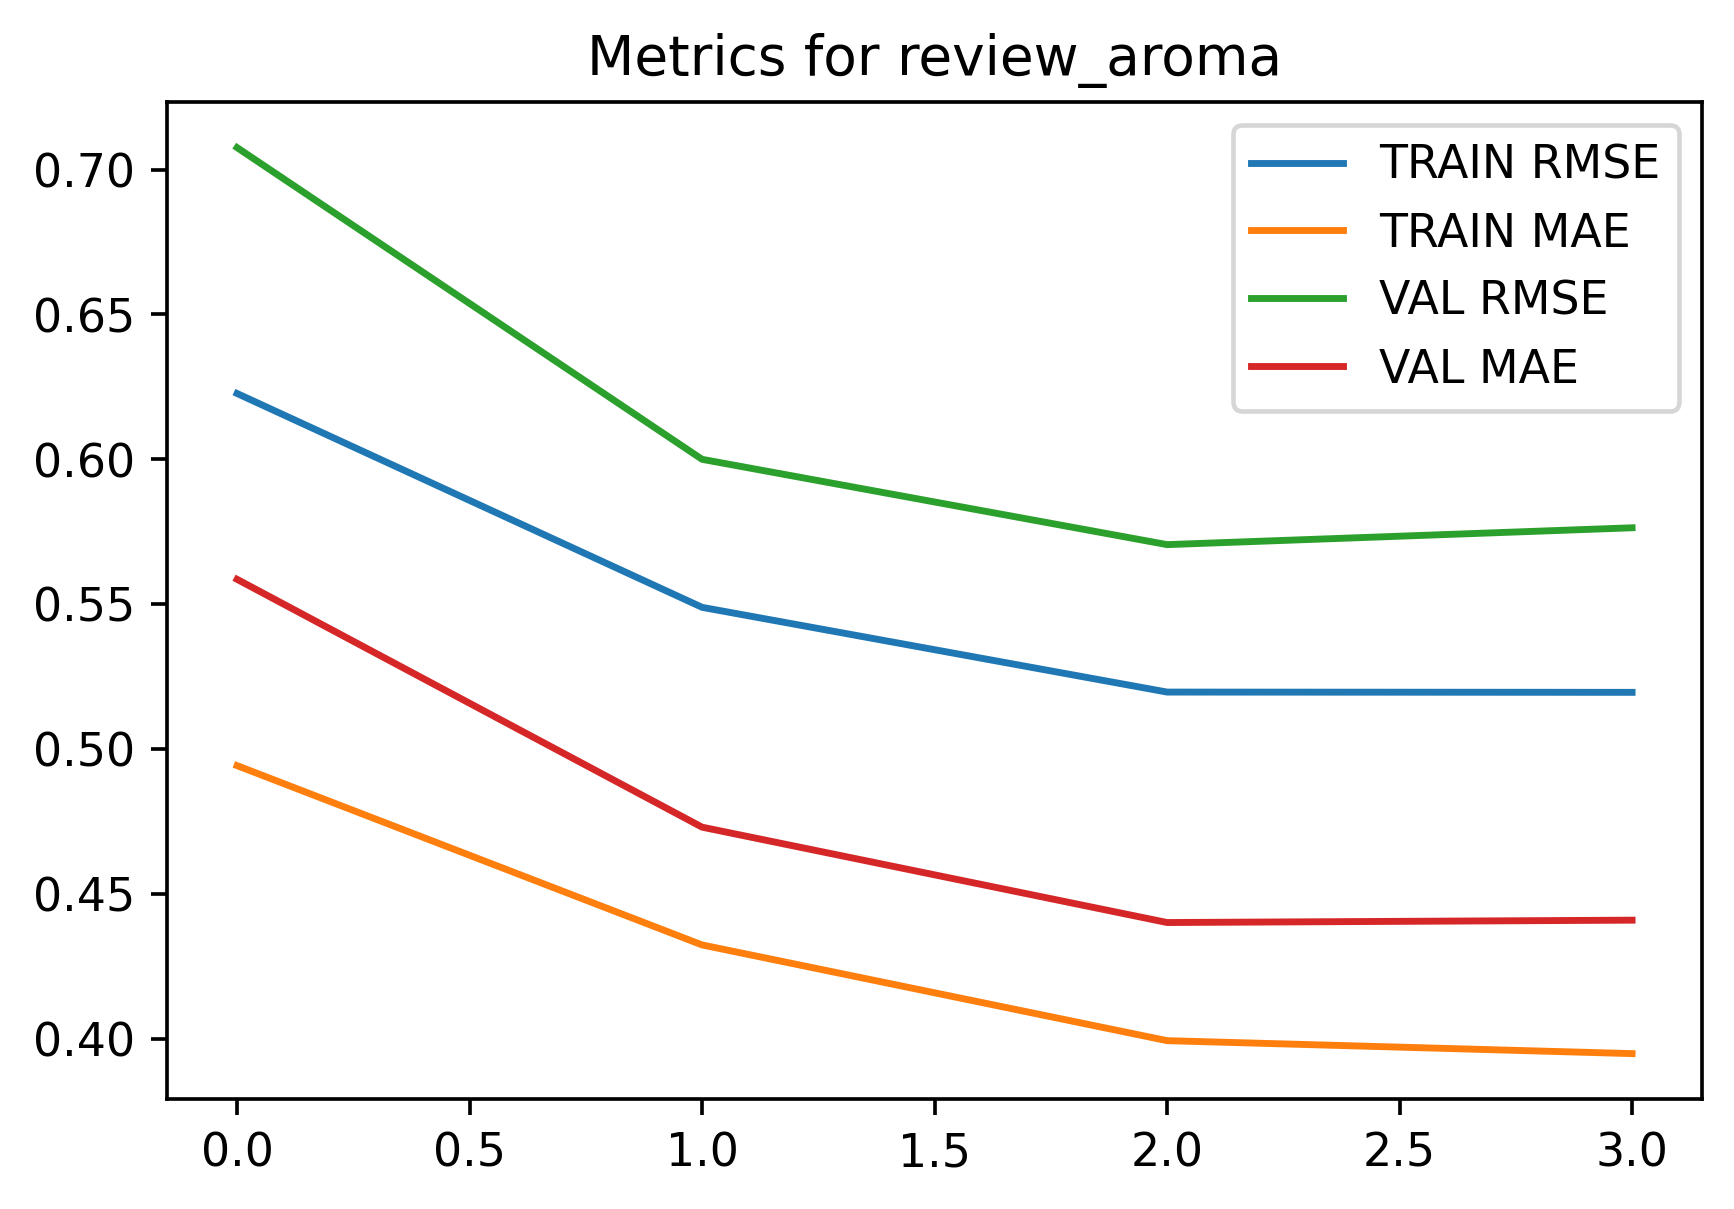

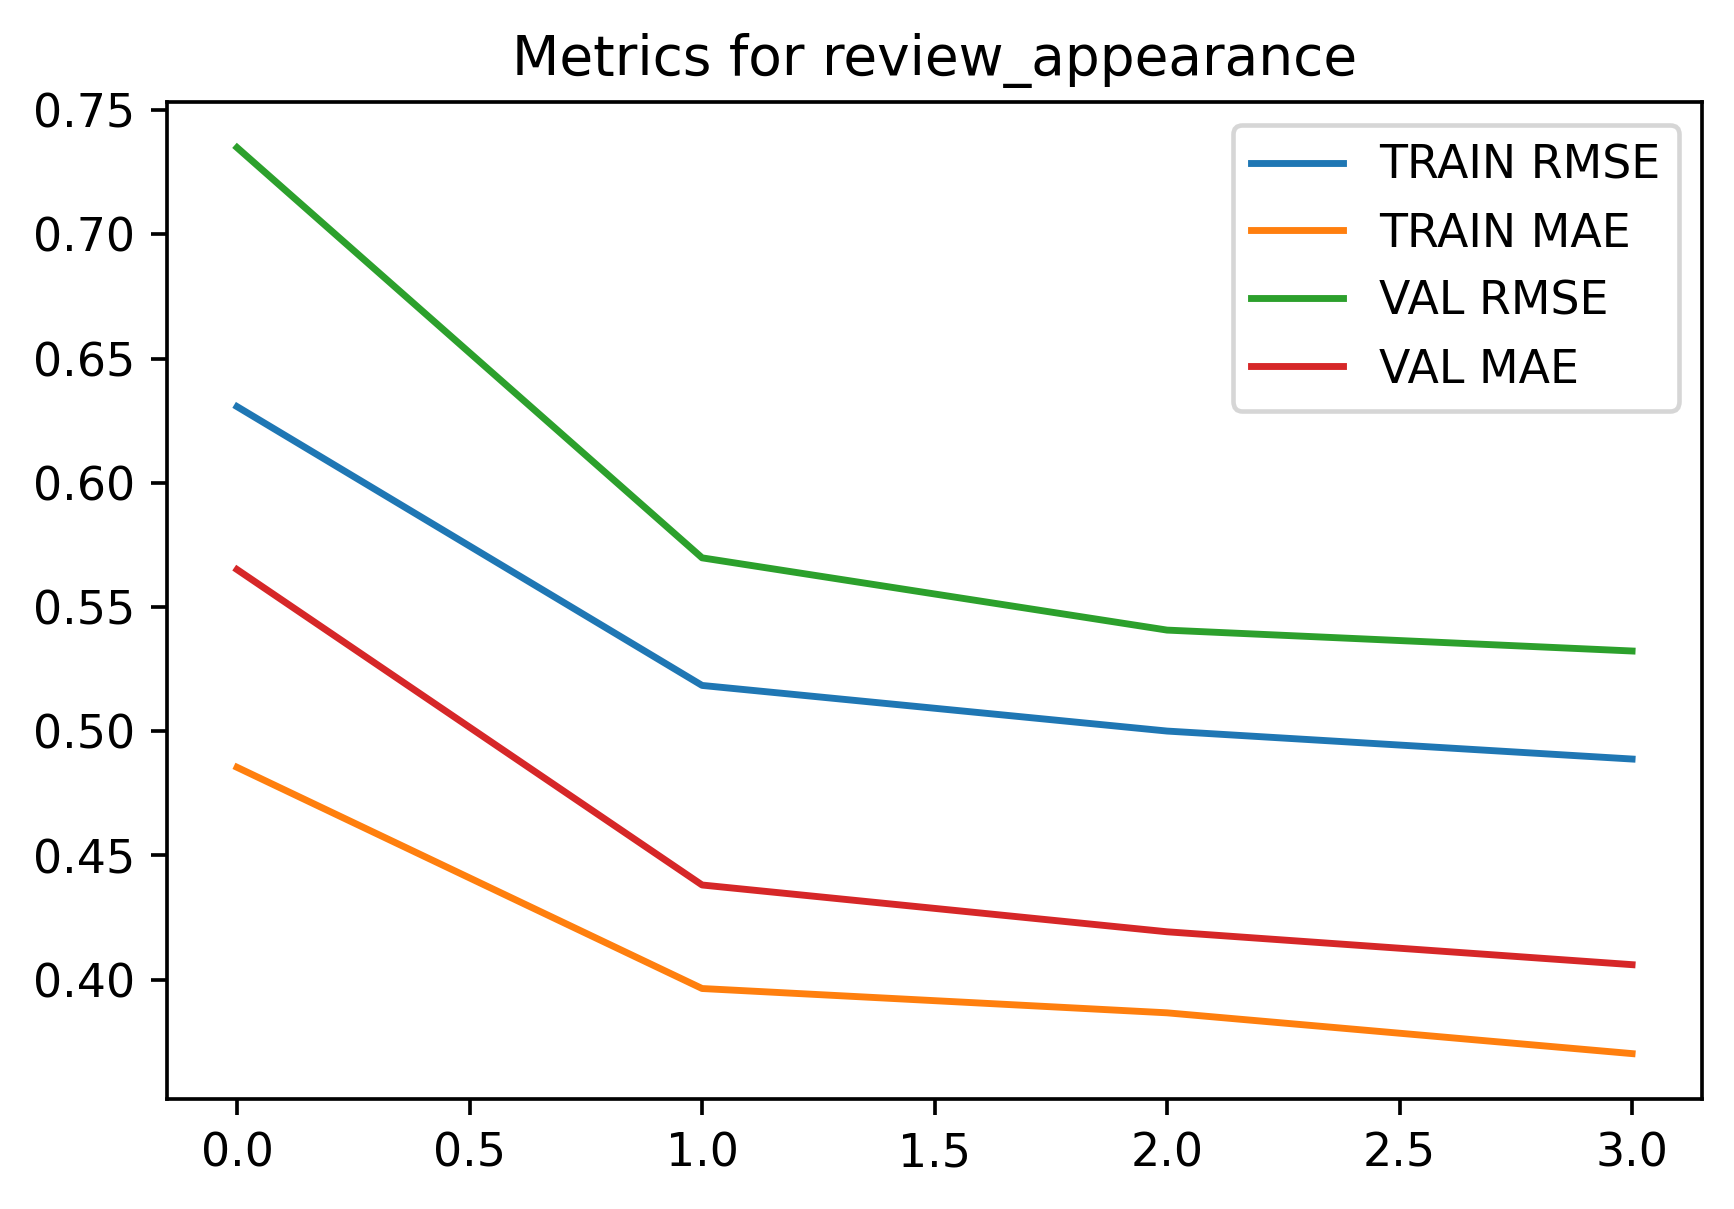

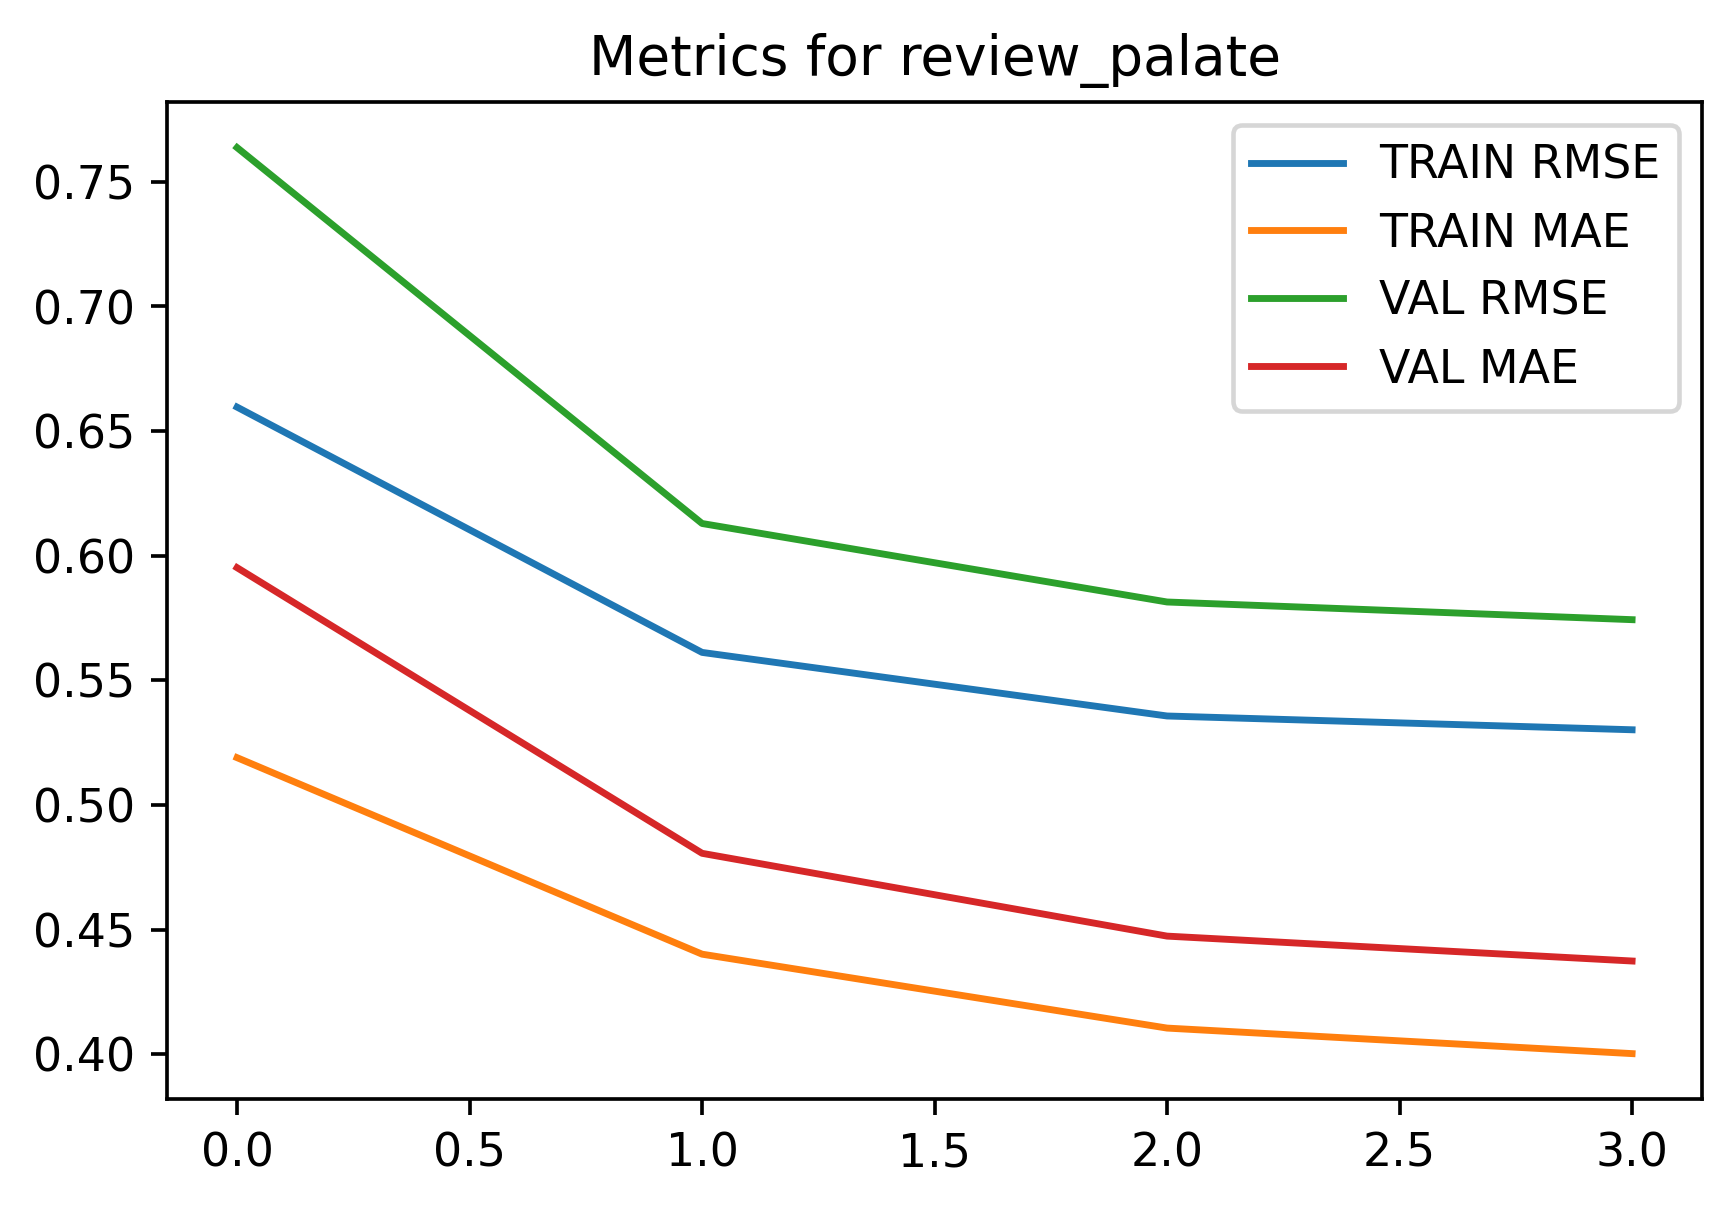

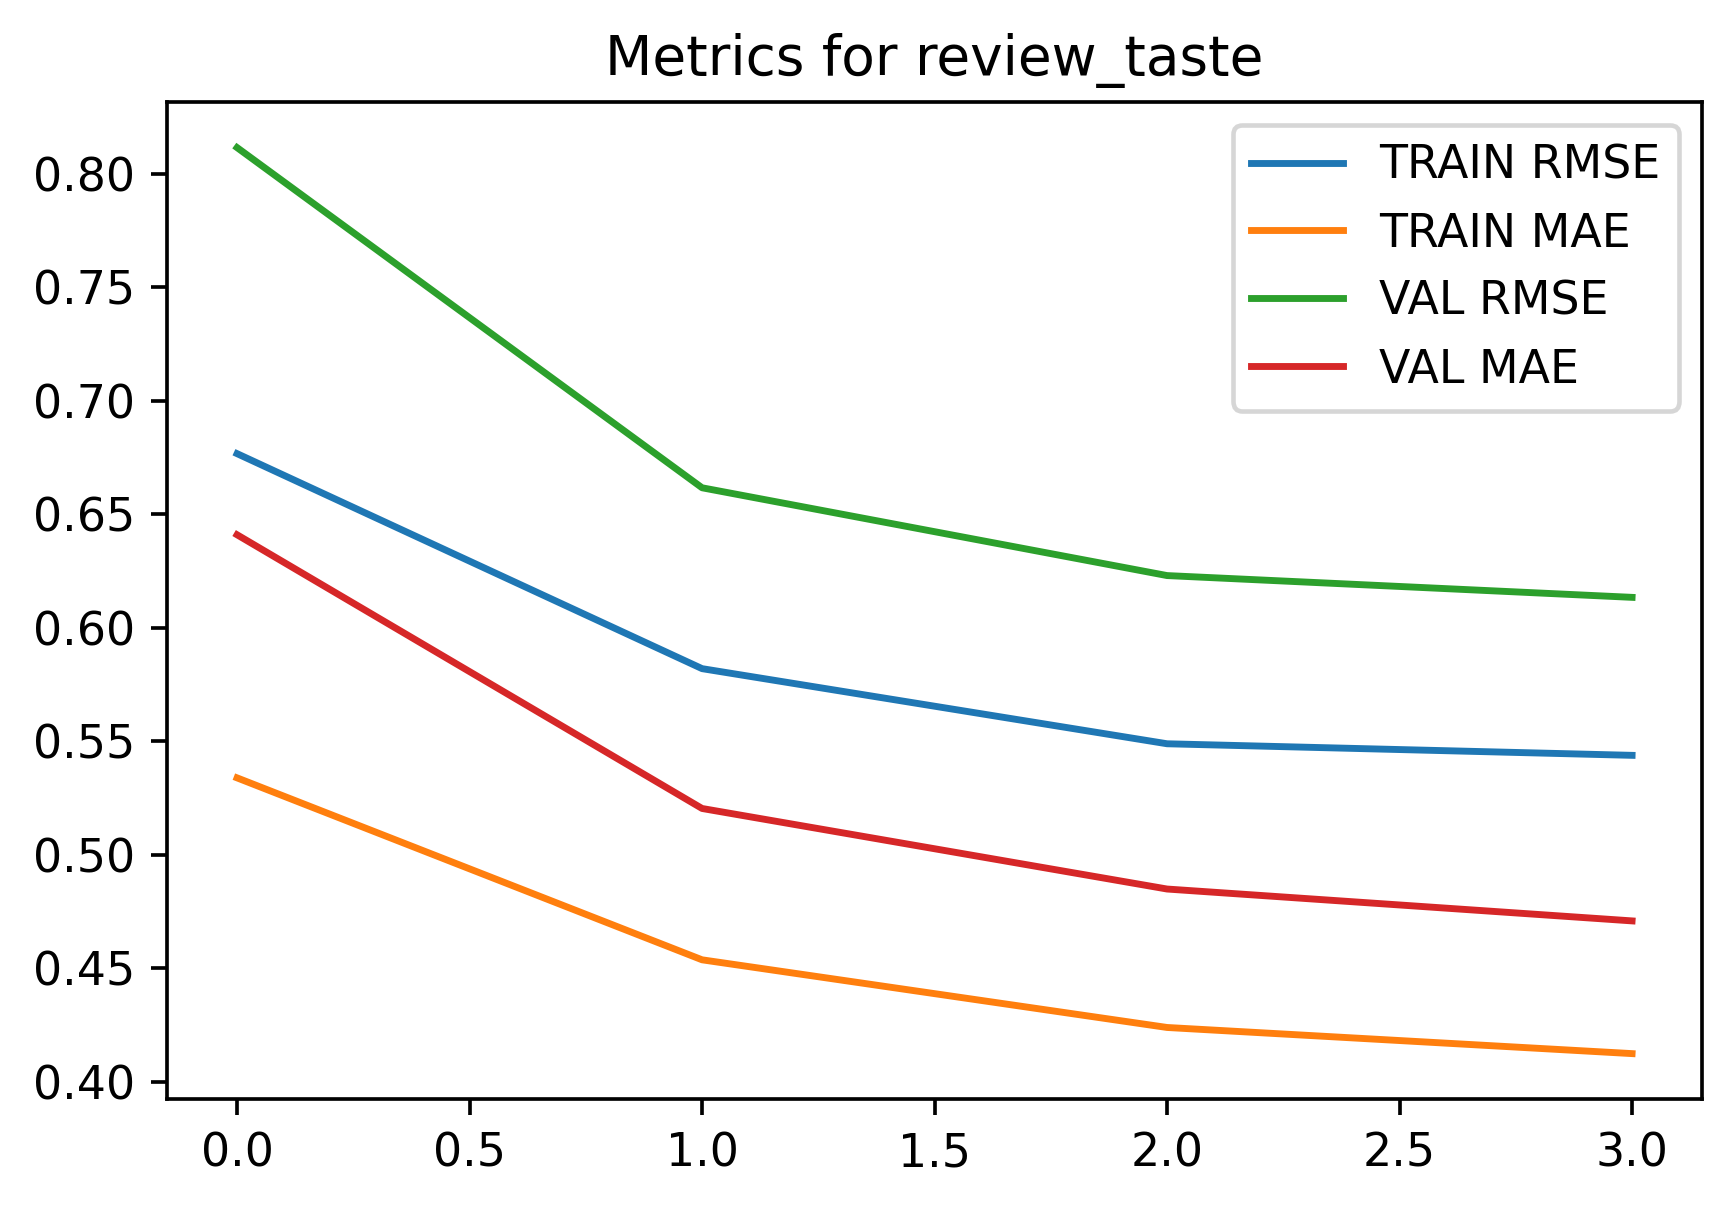

TEST metrics for field overall:
0.7083609285776181
0.53941166
TEST metrics for field review_aroma:
0.627789447602346
0.4866294
TEST metrics for field review_appearance:
0.553797020519655
0.42576584
TEST metrics for field review_palate:
0.6180142044731188
0.4722757
TEST metrics for field review_taste:
0.6774780492288216
0.5264705


In [6]:
run(data, use_similarity=True, gpu='1', epochs=4, lr=1e-4, embed_dim=64, r_hidden_dim=128)

[1,  1000] loss: 0.014, The best rmse/mae: 9999.000000 / 9999.000000
[1,  2000] loss: 0.011, The best rmse/mae: 9999.000000 / 9999.000000
[1,  3000] loss: 0.009, The best rmse/mae: 9999.000000 / 9999.000000
[1,  4000] loss: 0.007, The best rmse/mae: 9999.000000 / 9999.000000
[1,  5000] loss: 0.006, The best rmse/mae: 9999.000000 / 9999.000000
[1,  6000] loss: 0.005, The best rmse/mae: 9999.000000 / 9999.000000
[1,  7000] loss: 0.005, The best rmse/mae: 9999.000000 / 9999.000000
[1,  8000] loss: 0.004, The best rmse/mae: 9999.000000 / 9999.000000
TRAIN metrics for field overall:
0.6565271201172017
0.51896405
TRAIN metrics for field review_aroma:
0.5877625842400233
0.4713648
TRAIN metrics for field review_appearance:
0.57907101838485
0.4578607
TRAIN metrics for field review_palate:
0.6083158923832213
0.48721394
TRAIN metrics for field review_taste:
0.6100831441029213
0.48945135
VALIDATION metrics for field overall:
0.7477495284772513
0.58666855
VALIDATION metrics for field review_aroma:


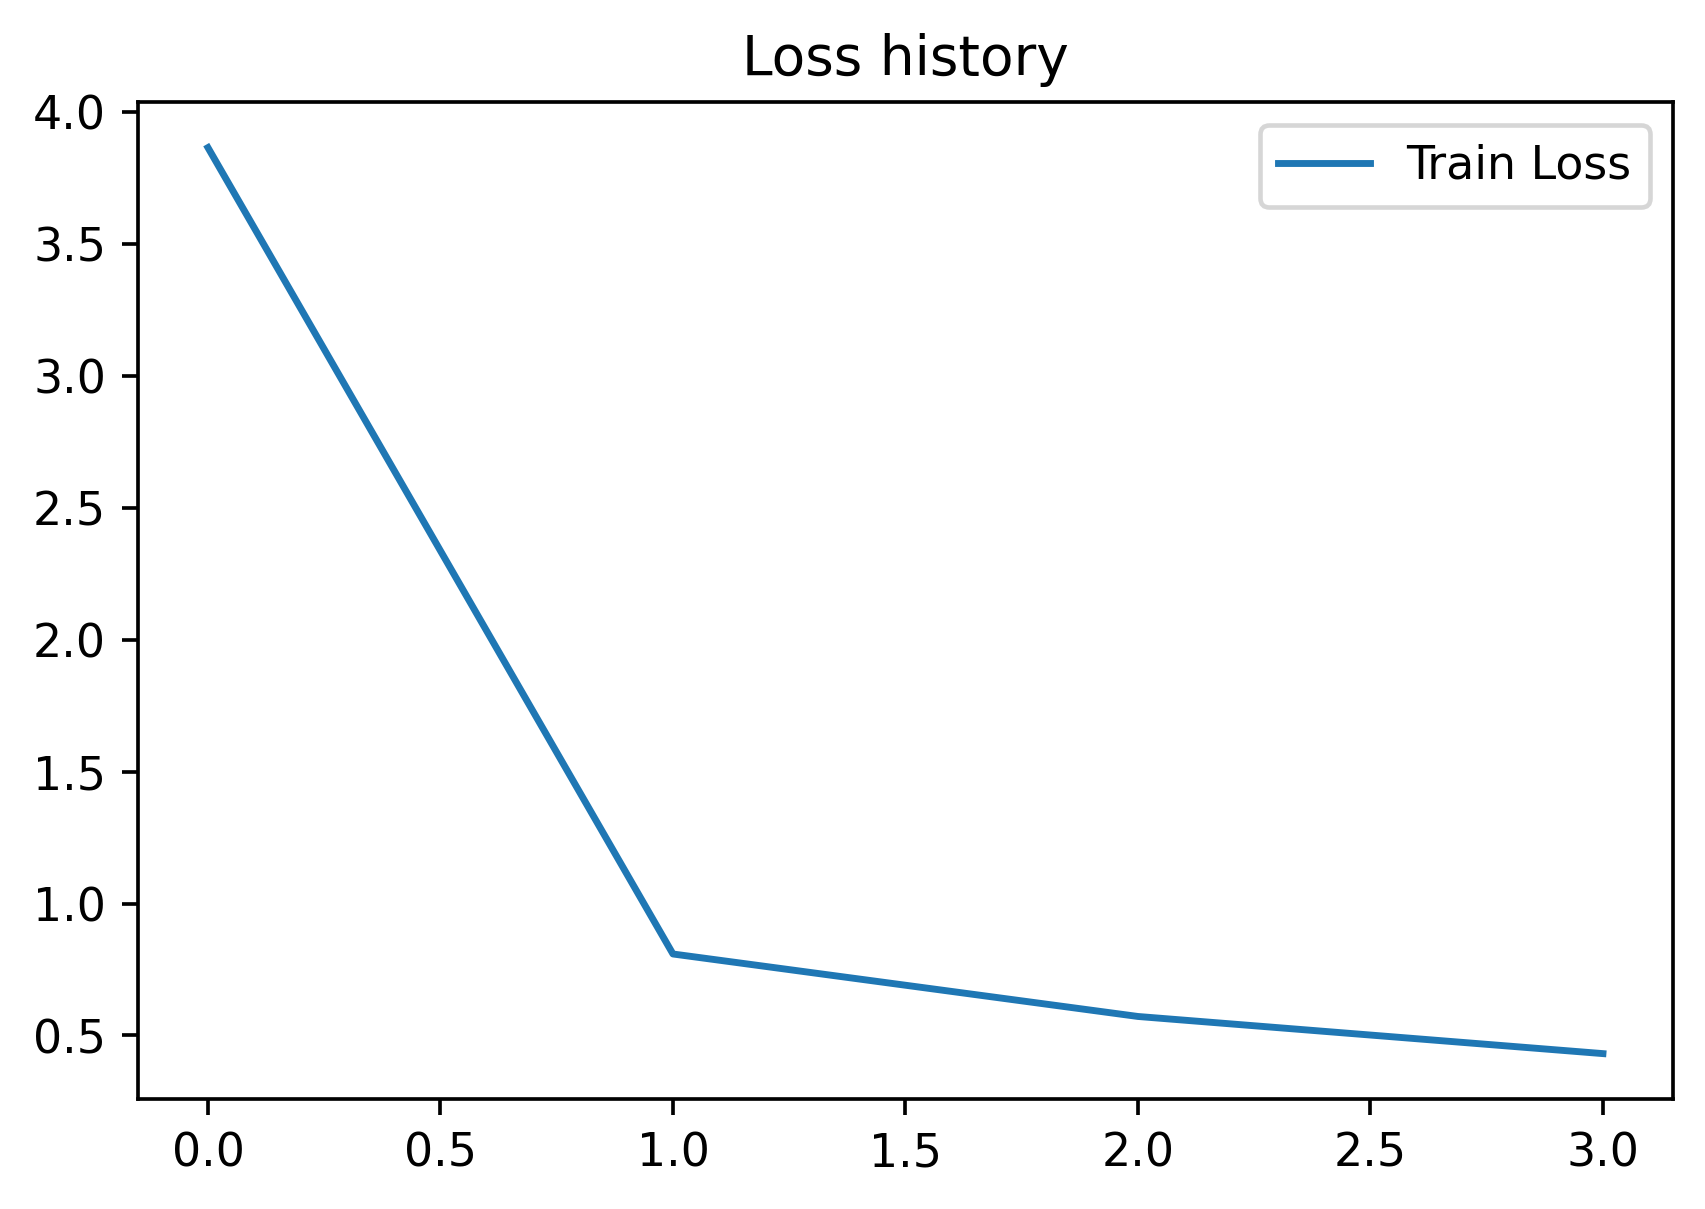

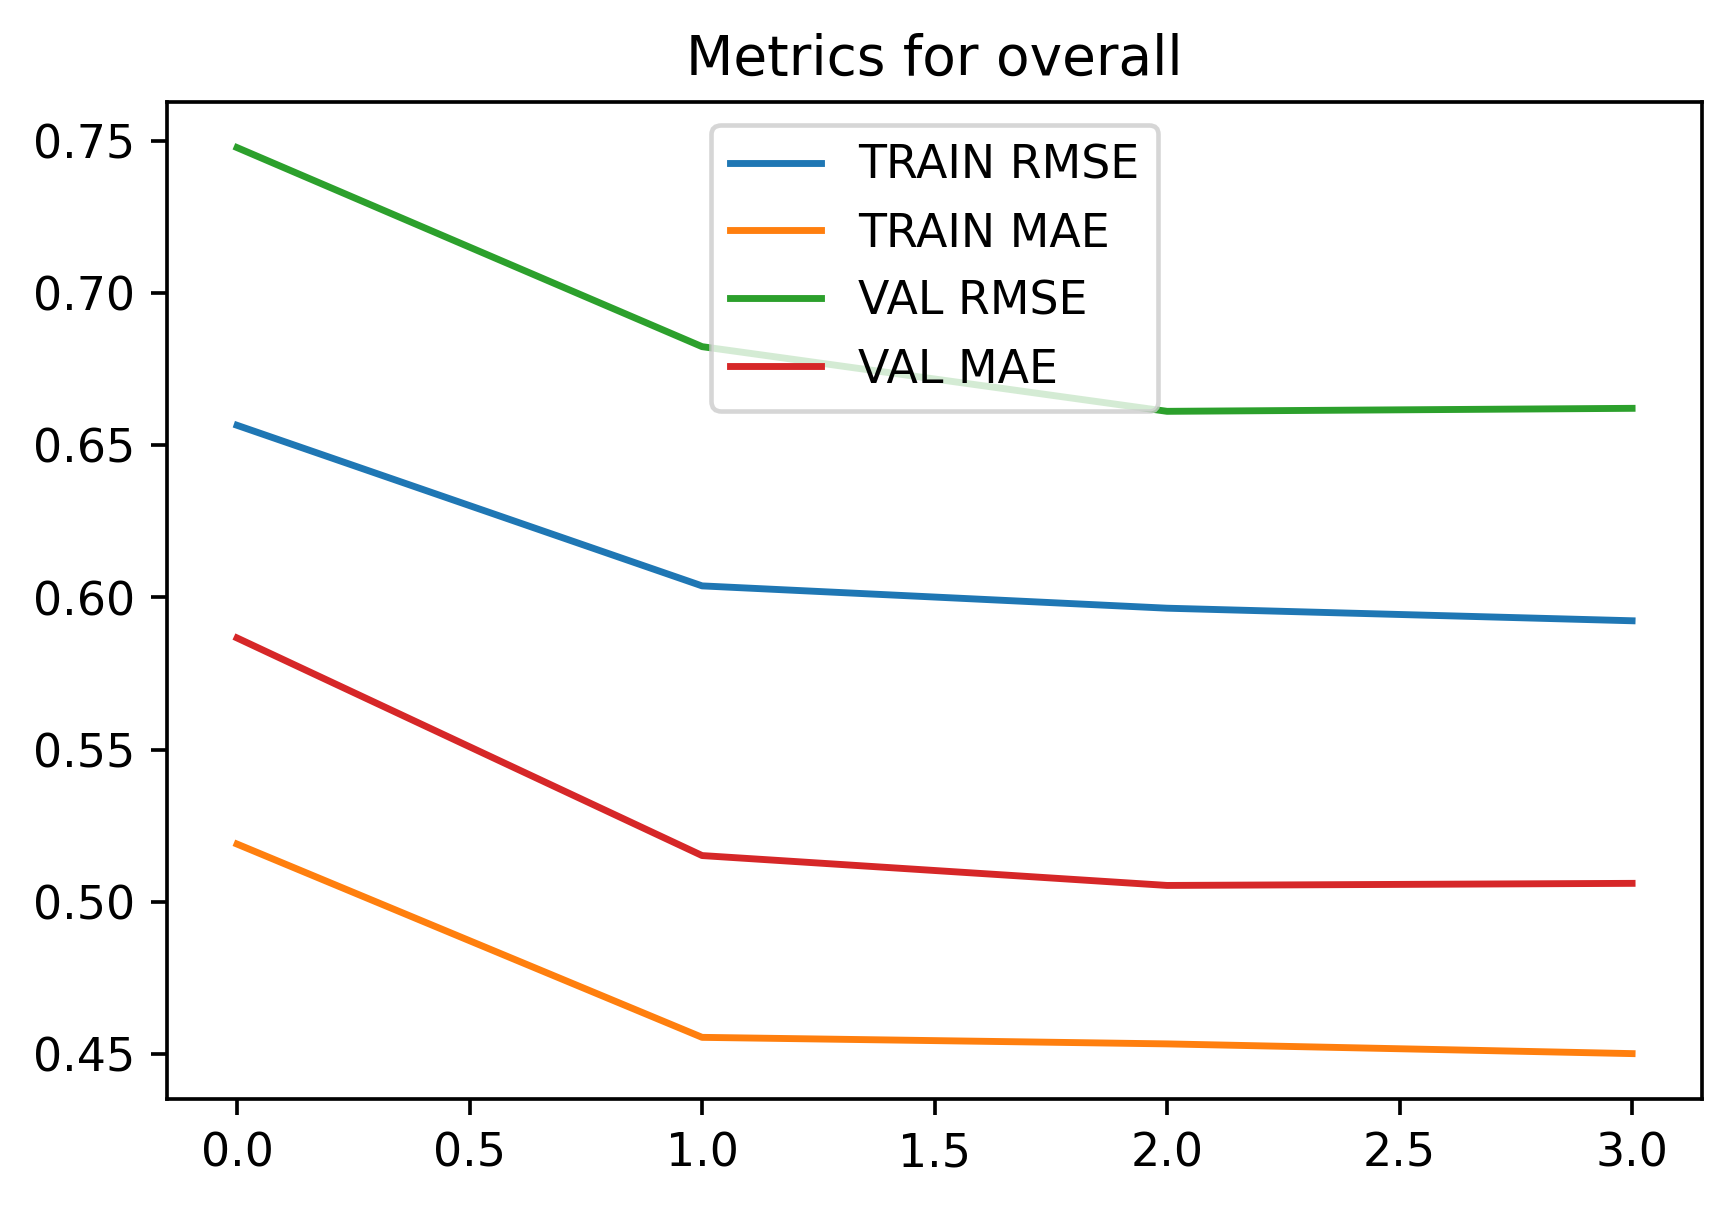

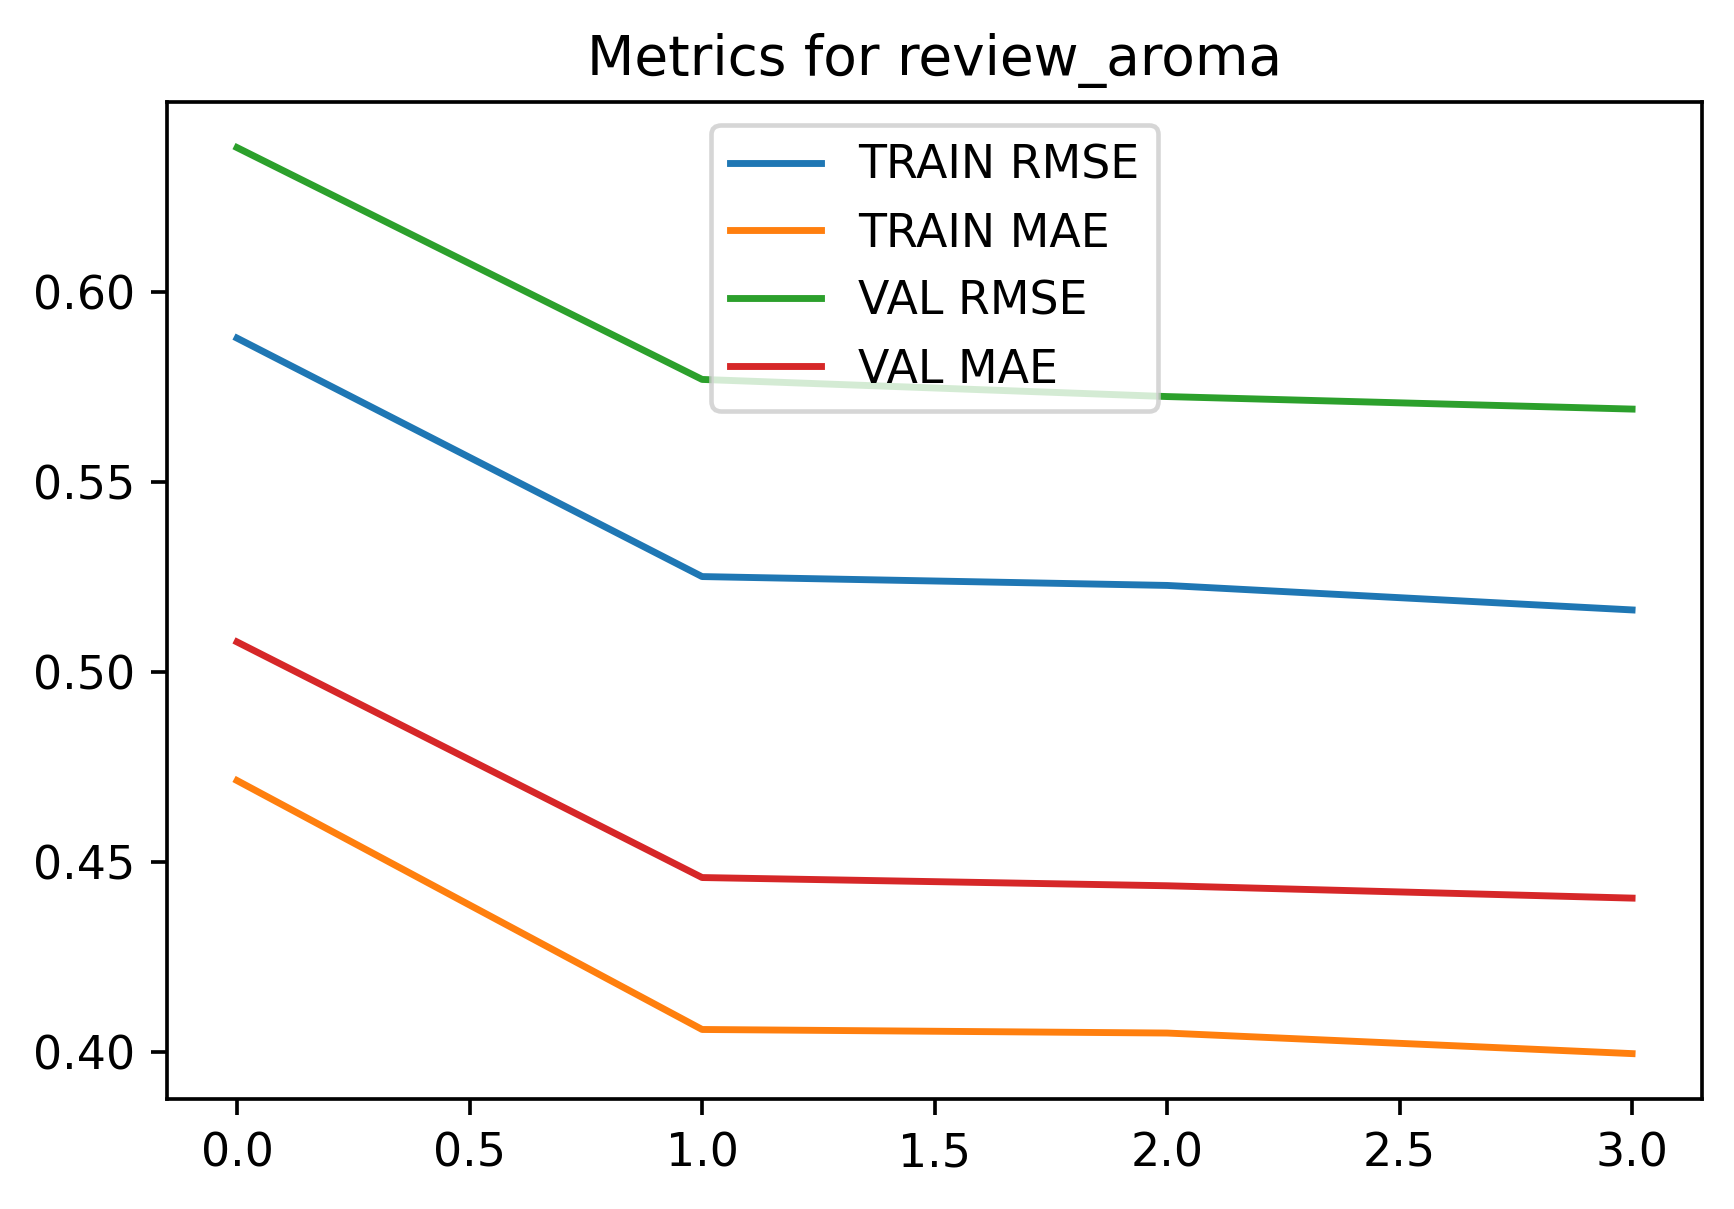

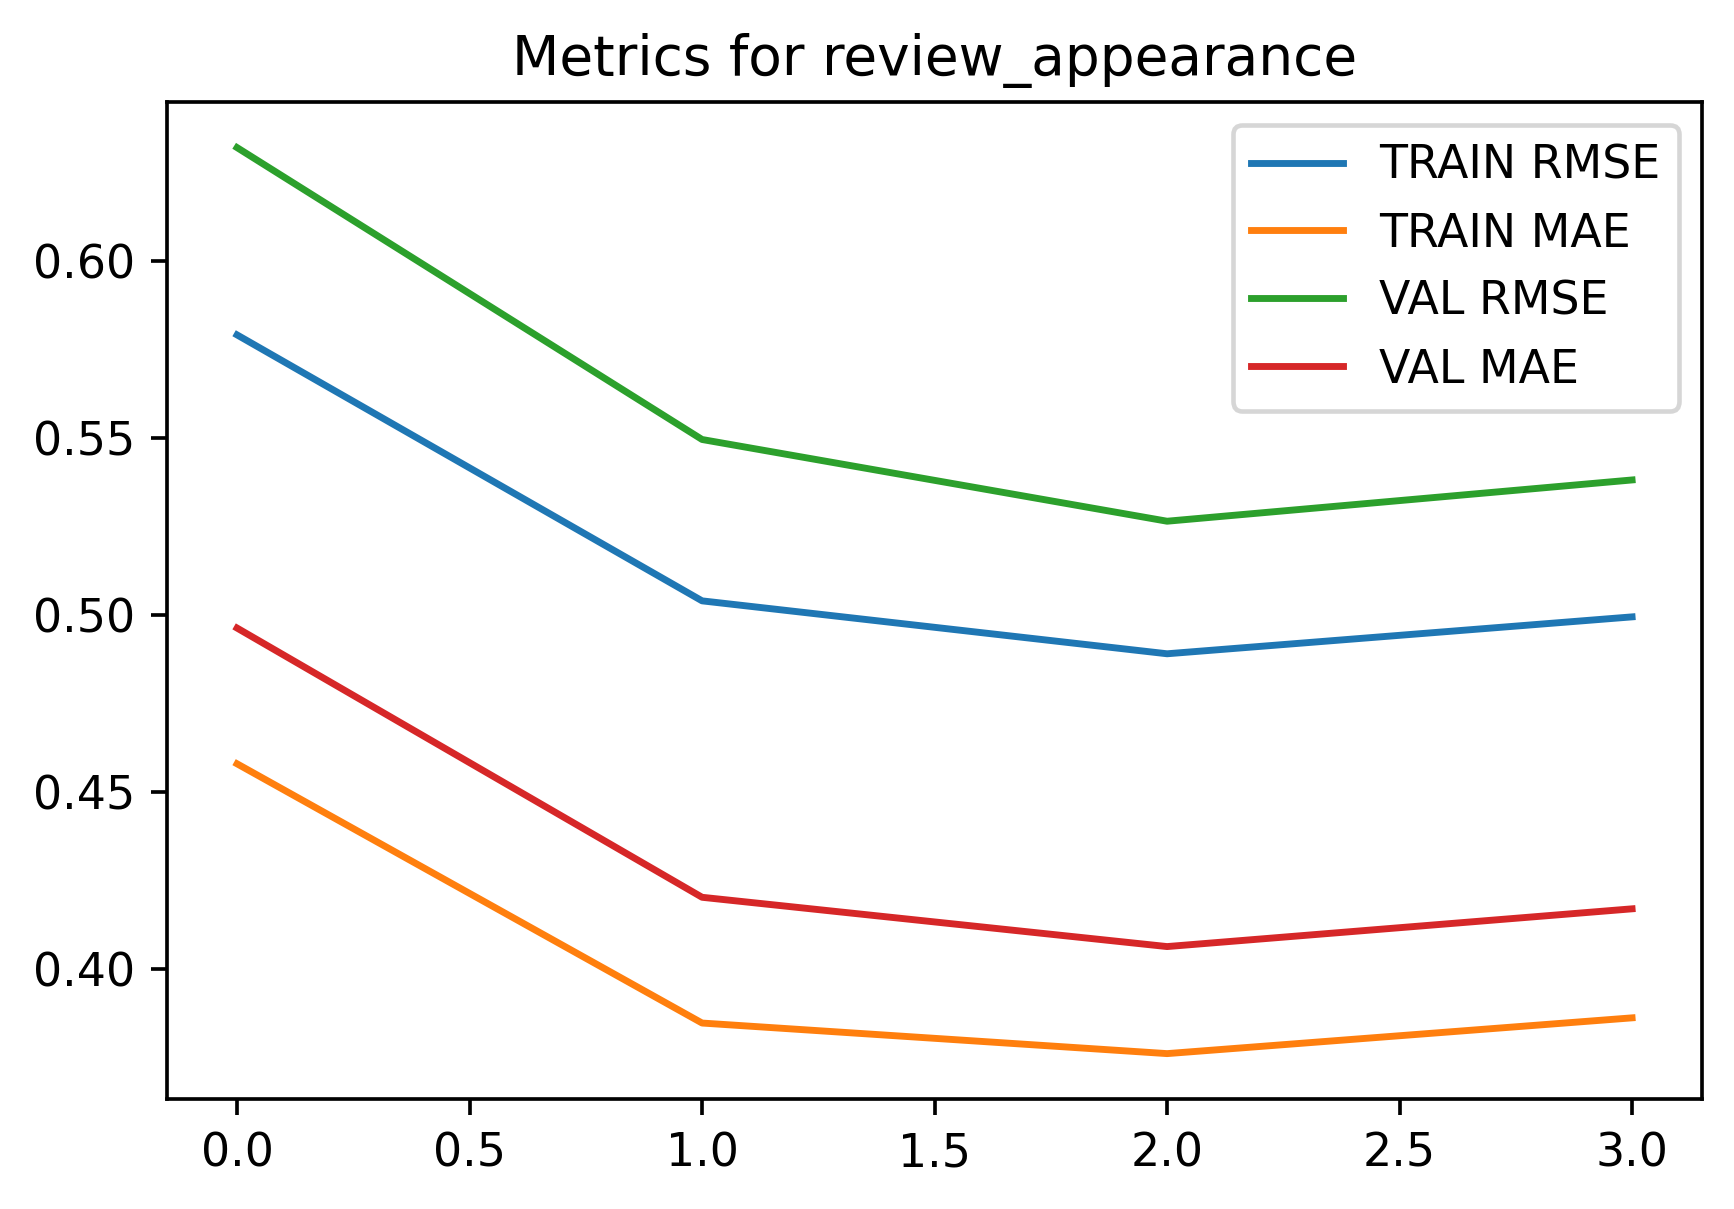

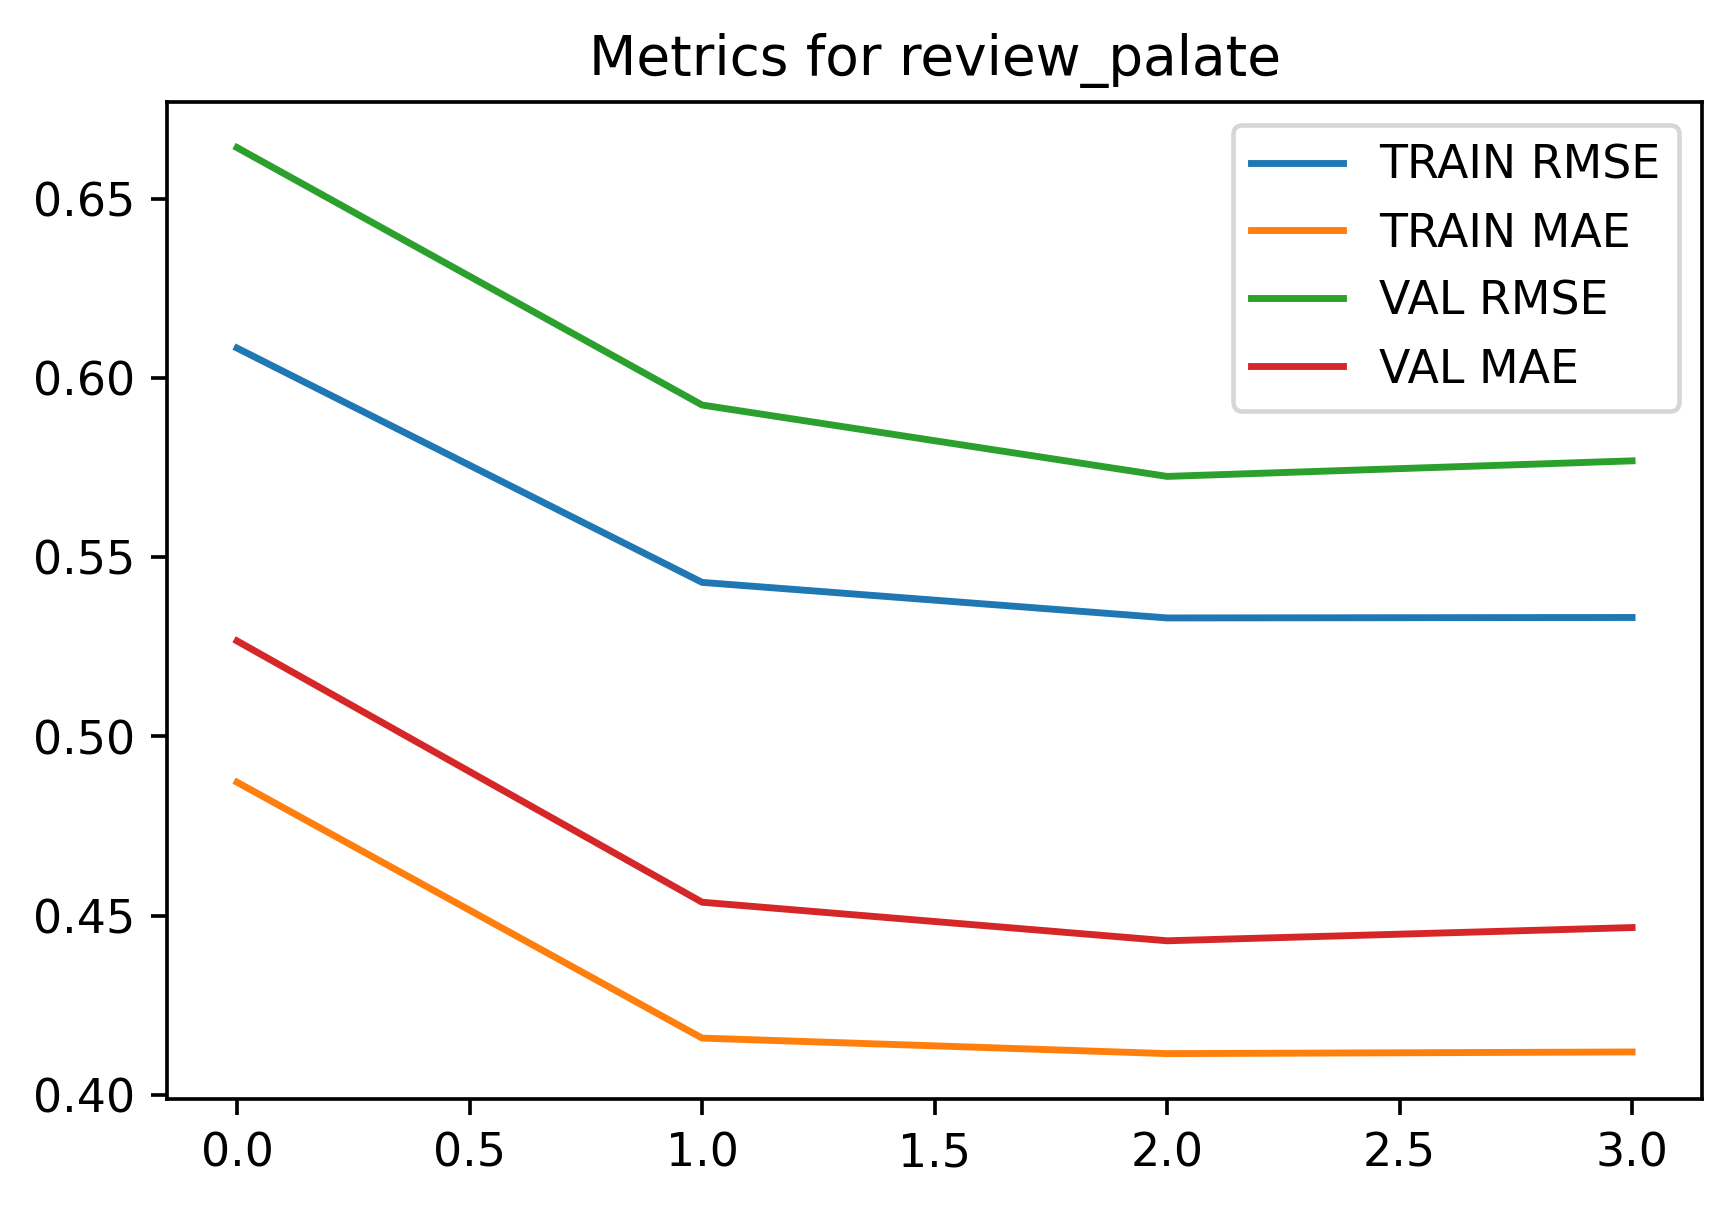

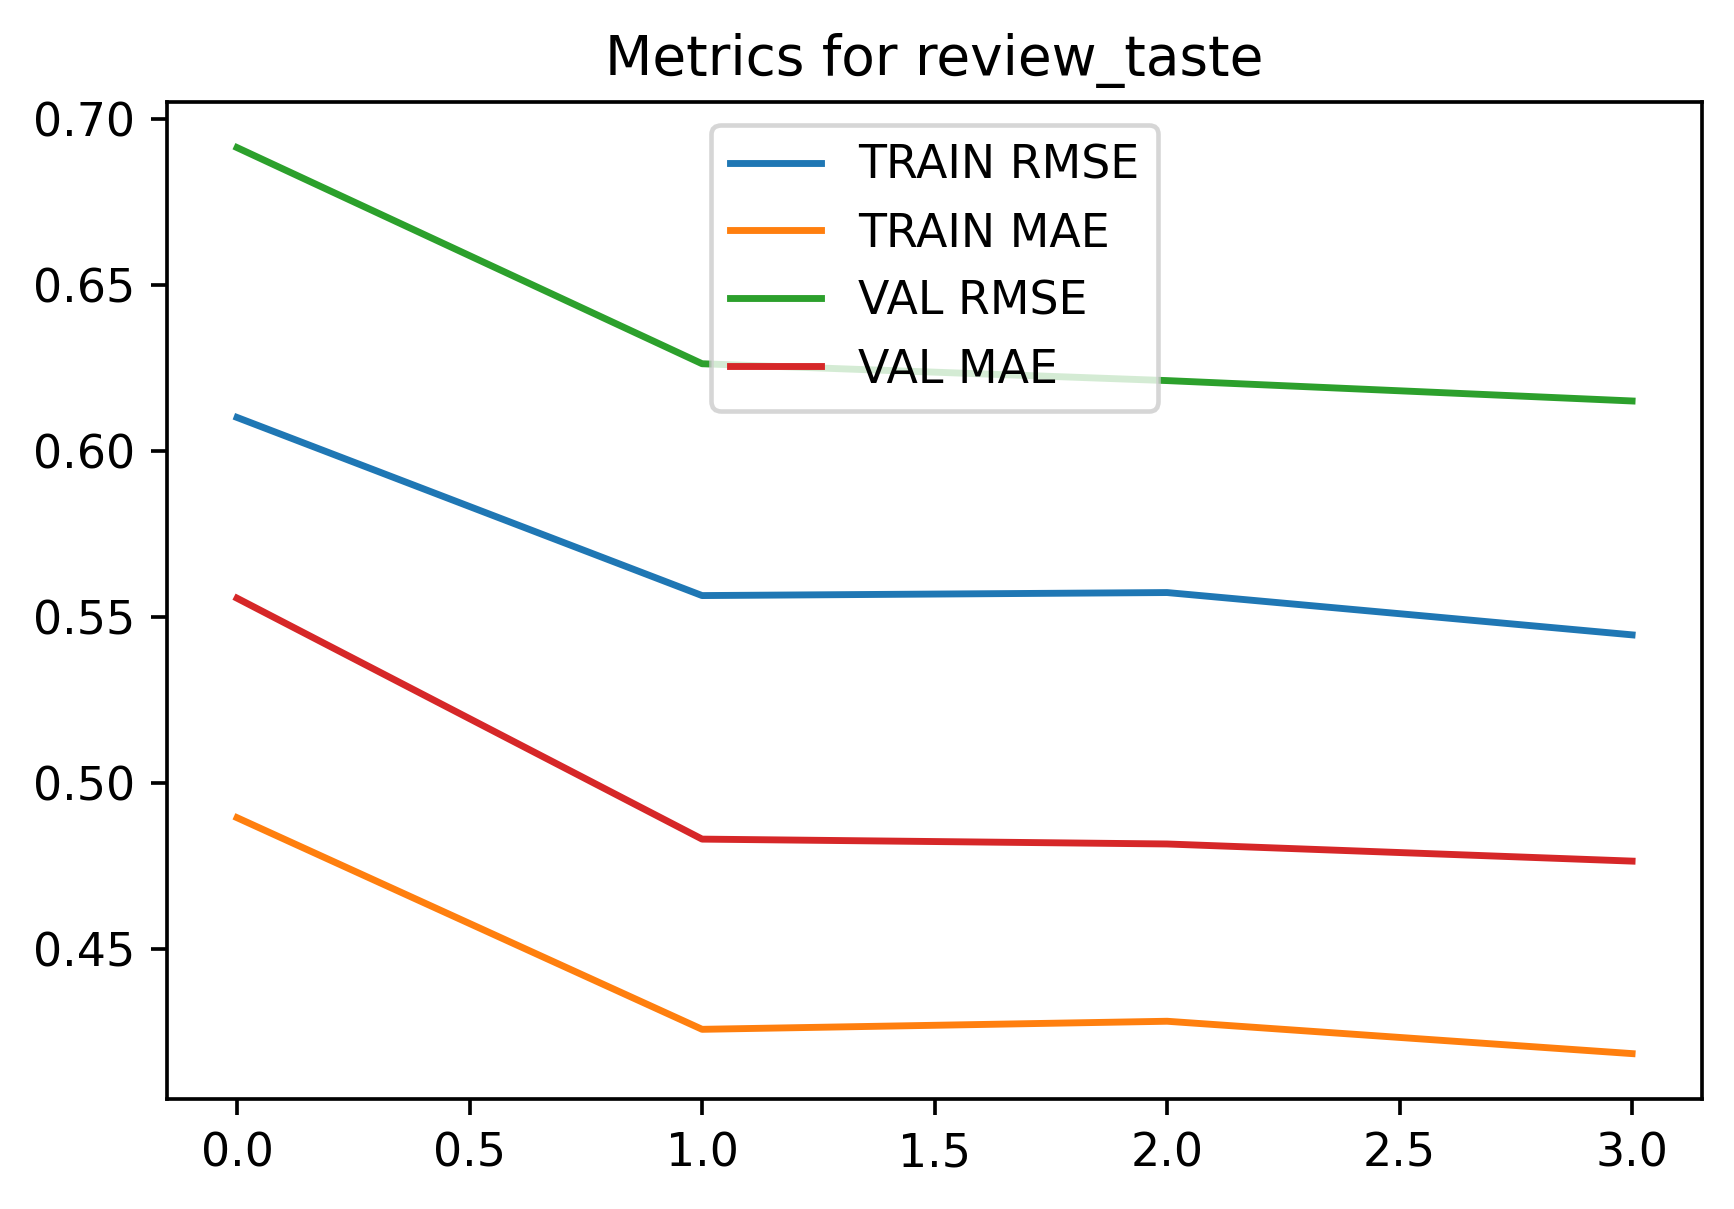

TEST metrics for field overall:
0.7010434173819082
0.53722924
TEST metrics for field review_aroma:
0.6154479851843067
0.47980648
TEST metrics for field review_appearance:
0.5566530995895229
0.43053716
TEST metrics for field review_palate:
0.6100564472080728
0.470911
TEST metrics for field review_taste:
0.6702986789158808
0.5222605


In [7]:
run(data, use_similarity=True, gpu='1', epochs=4, lr=1e-4, embed_dim=128, r_hidden_dim=256)

31883
9186
[1,   100] loss: 0.148, The best rmse/mae: 9999.000000 / 9999.000000
[1,   200] loss: 0.145, The best rmse/mae: 9999.000000 / 9999.000000
[1,   300] loss: 0.142, The best rmse/mae: 9999.000000 / 9999.000000
[1,   400] loss: 0.139, The best rmse/mae: 9999.000000 / 9999.000000
[1,   500] loss: 0.136, The best rmse/mae: 9999.000000 / 9999.000000
[1,   600] loss: 0.133, The best rmse/mae: 9999.000000 / 9999.000000
[1,   700] loss: 0.130, The best rmse/mae: 9999.000000 / 9999.000000
[1,   800] loss: 0.128, The best rmse/mae: 9999.000000 / 9999.000000
[1,   900] loss: 0.125, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1000] loss: 0.122, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1100] loss: 0.119, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1200] loss: 0.117, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1300] loss: 0.114, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1400] loss: 0.111, The best rmse/mae: 9999.000000 / 9999.000000
[1,  1500] loss: 0.109,

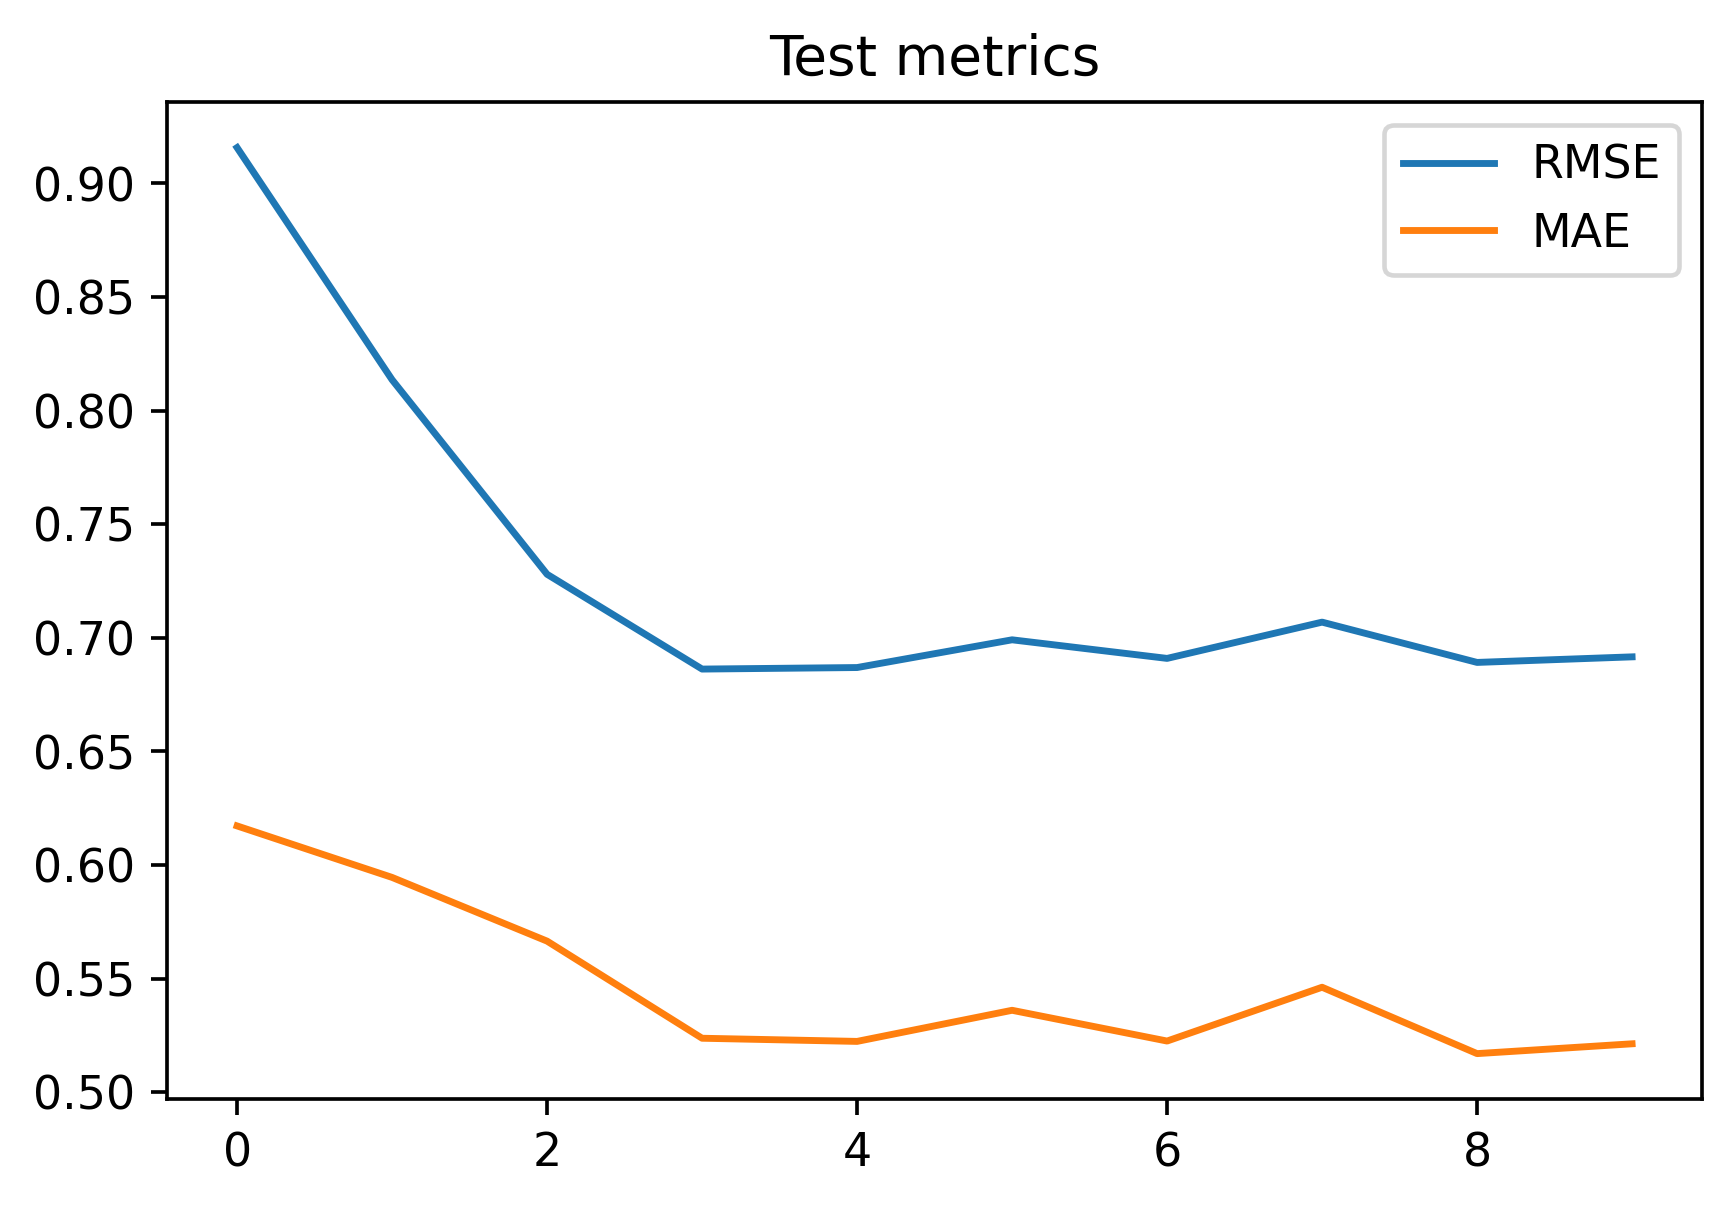

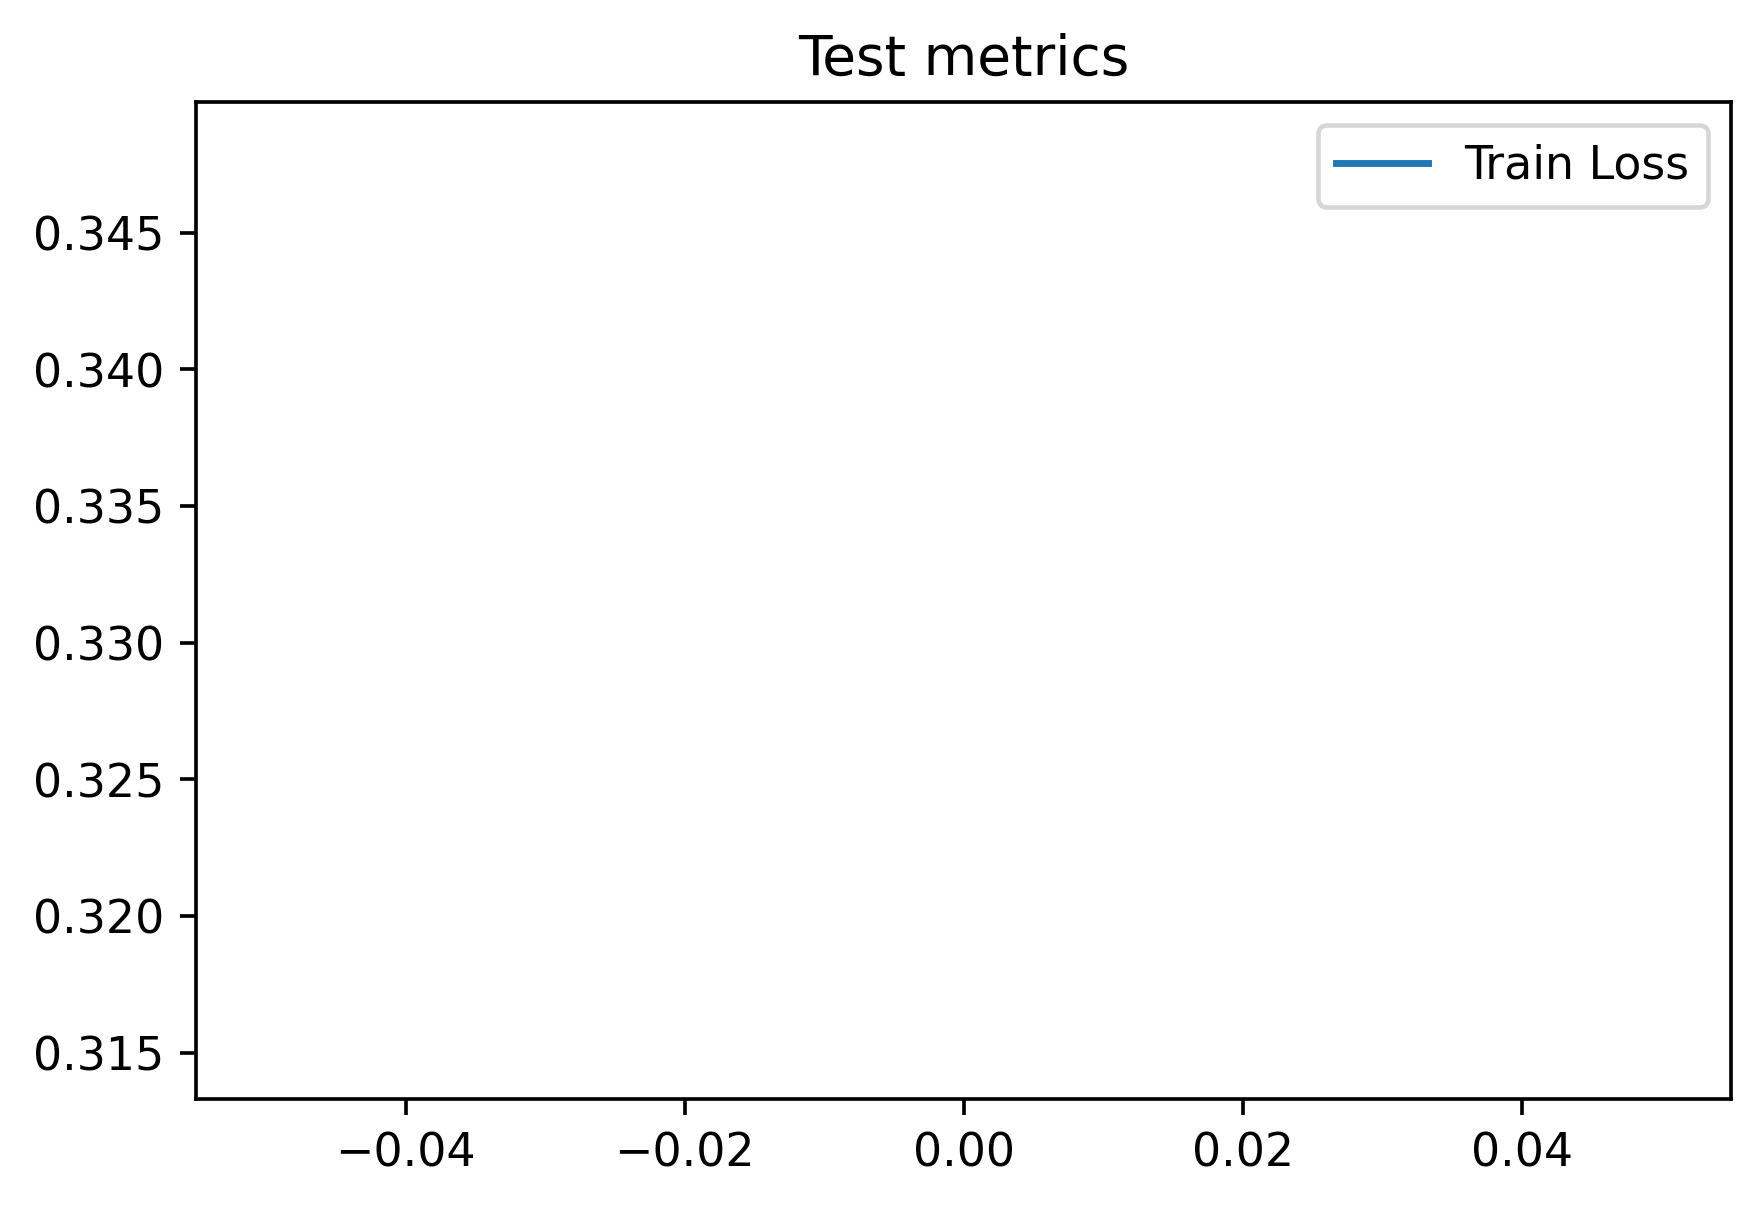

In [11]:
run(data, use_similarity=True, gpu='1', epochs=10, lr=1e-4)